# Module 1. Samples


In [107]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

# Package imports for time series analysis
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error,mean_squared_error

import math


KWALITATIEF
- nominaal: categorie zonder waarde bv. ras, land, geslacht,...
- ordinaal: orderang bv. plaats bij politie, studiegraad,...

KWANTITATIEF
- interval: geen nulpunt, geen verhouding bv. C°, F°,...
- ratio: absoluut nulpunt bv. afstand (meter), gewicht (kilogram),...

## Sample testing
Sample = deel van de populatie
Random: willekeurig, iedereen maakt evenveel kans
Non-Random: niet iedereen heeft evenveel kans

## Mogelijke fouten
- Accidental: per toeval vs Systematic: systematisch
- Sample error: fouten door de keuze van de sample vs - Non-Sample error: fouten los van de sample

## Opening a Dataset, General Information

 **de basics**

In [4]:
# Importing the Titanic dataset. (Rajagopalan, 2021, p. 106)
titanic = pd.read_csv('https://raw.githubusercontent.com/DataRepo2019/Data-files/master/titanic.csv')
# Show the first few records of the Data Frame
titanic.head()

print(f"Number of rows: {len(titanic)}")
print(f"Number of columns: {len(titanic.columns)}")
print(f"The shape of the Data Frame is: {titanic.shape}")
print("*"*50)
titanic.info()

# Give the data type of each column.
print("*"*50)
print(titanic.dtypes)

# How many columns of each data type are there?
#   Watch it! The book says to use get_dtype_counts(), but this method no longer exists
print("*"*50)
print(titanic.dtypes.value_counts())

Number of rows: 891
Number of columns: 12
The shape of the Data Frame is: (891, 12)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
**************************************************
PassengerId      int64
Survived         int64
Pclass      

een kolom als index zetten:

In [ ]:
titanic.set_index(['PassengerId'])

## Qualitative variables
soms is er een variable verkeerd ingesteld, je kan deze verzetten naar een kwalitatieve variable 

In [6]:
# Describe the variable Survived -> is considered to be quantitative
print(titanic.Survived.describe())
# Convert to a categorical variable
titanic.Survived = titanic.Survived.astype('category')
# Ask to describe once more -> not it is considered to be qualitative
print(titanic.Survived.describe())

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
count     891
unique      2
top         0
freq      549
Name: Survived, dtype: int64


je kan ook variable als ordinale aanwijzen

In [7]:
print(titanic.Embarked.unique())

embarked_type = CategoricalDtype(categories=['S', 'C', 'Q'], ordered=True)
titanic.Embarked = titanic.Embarked.astype(embarked_type)
titanic.Embarked.describe()

['S' 'C' 'Q' nan]


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

toon deze waarden in een staafdiagram zoals deze  
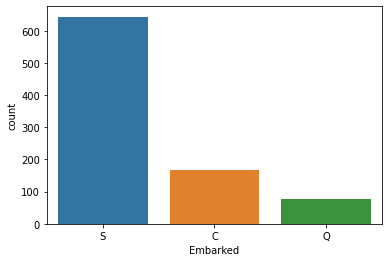

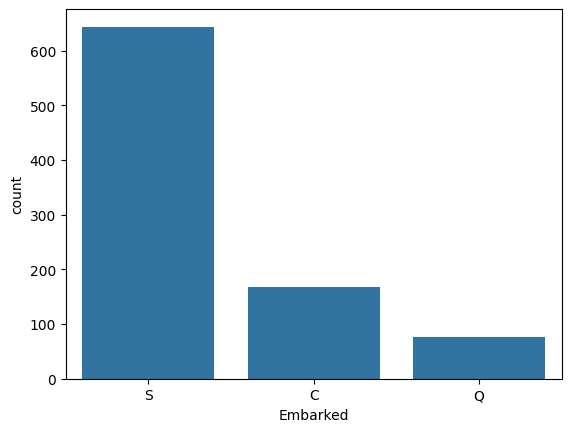

In [8]:
sns.countplot(data=titanic, x='Embarked');

## selecting data
enkele eenvoudige code 

In [ ]:
# Select adjacent columns
titanic.iloc[:, 2:4]
titanic[['Name', 'Age', 'Cabin']] # Note: two sets of square brackets!
# Observation with row number 5 (counting from zero)
print(titanic.iloc[5])
# The first 4 observations
titanic.iloc[0:4]
# Select observations where the value of Age is less than 18
titanic[titanic.Age < 18]  
# The same, but only keep the column 'Embarked'
titanic[titanic.Age < 18].Embarked
# The same, but keep columns 'Age' and 'Embarked'
titanic[titanic['Age'] < 18][['Age', 'Embarked']]
# Select all boys younger than 10
titanic.query("(Sex=='male') and (Age < 18)")

## Dropping Data and Working with Missing Data


een kolom verwijderen kan zo

In [ ]:
titanic.drop("PassengerId", axis="columns")

#volledig verwijderen
titanic= titanic.drop("PassengerId", axis="columns")

cleaned = titanic.dropna() # Drop any row that has at least one missing value

cleaned = titanic.dropna(how="all") # Drop any row where all values are missing

print(titanic.count()) # Count the amount of (non) missing values on the dataframe

# Als we missing values willen opvullen met bvb de avg:
avg_age = titanic['Age'].mean()
titanic = titanic.fillna(value={'Age' : avg_age})
titanic.count() # nu heeft age geen missing values meer


## Creating New Columns

In [ ]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882

# Module 2: Analysis of variable
Gemiddelde, mediaan, modus

In [13]:
tips = sns.load_dataset("tips")    # Info on tips given at restaurants

## Qualitative Variables

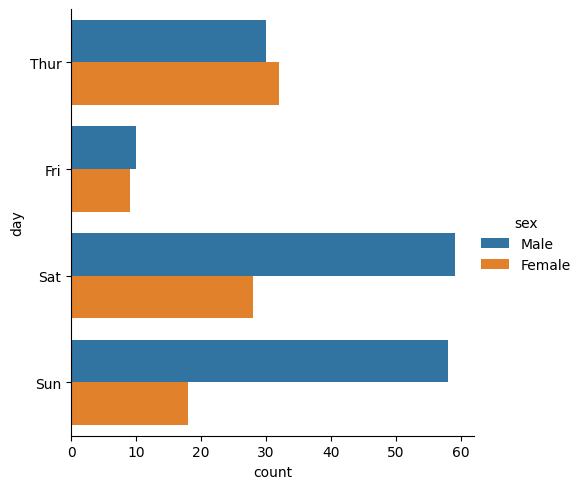

In [14]:
# Bar chart in Seaborn: catplot() with 'kind = "count"''
sns.catplot(data = tips, kind = "count", y = "day", hue='sex');

### Centrality Measures

In [ ]:
# Mode for all the variables in the DataFrame
tips.mode()
# Mode for a specific variable
tips["day"].mode()
# Some descriptive measures
tips["day"].describe()
tips["smoker"].value_counts()

## Quantitative Variables  
### Visualisation

**Box-and-whisker plots** (sometimes referred to as boxplots) typically show only five 'points' from the distribution - the top and bottom of the range, the median and the upper and lower quartiles (UQ and LQ).  
These five values are sometimes known as the quartiles and the notation Q<sub>0</sub>, Q<sub>1</sub>, Q<sub>2</sub>, Q<sub>3</sub>, Q<sub>4</sub> is sometimes used to refer to minimum, LQ, median, UQ and maximum respectively. 

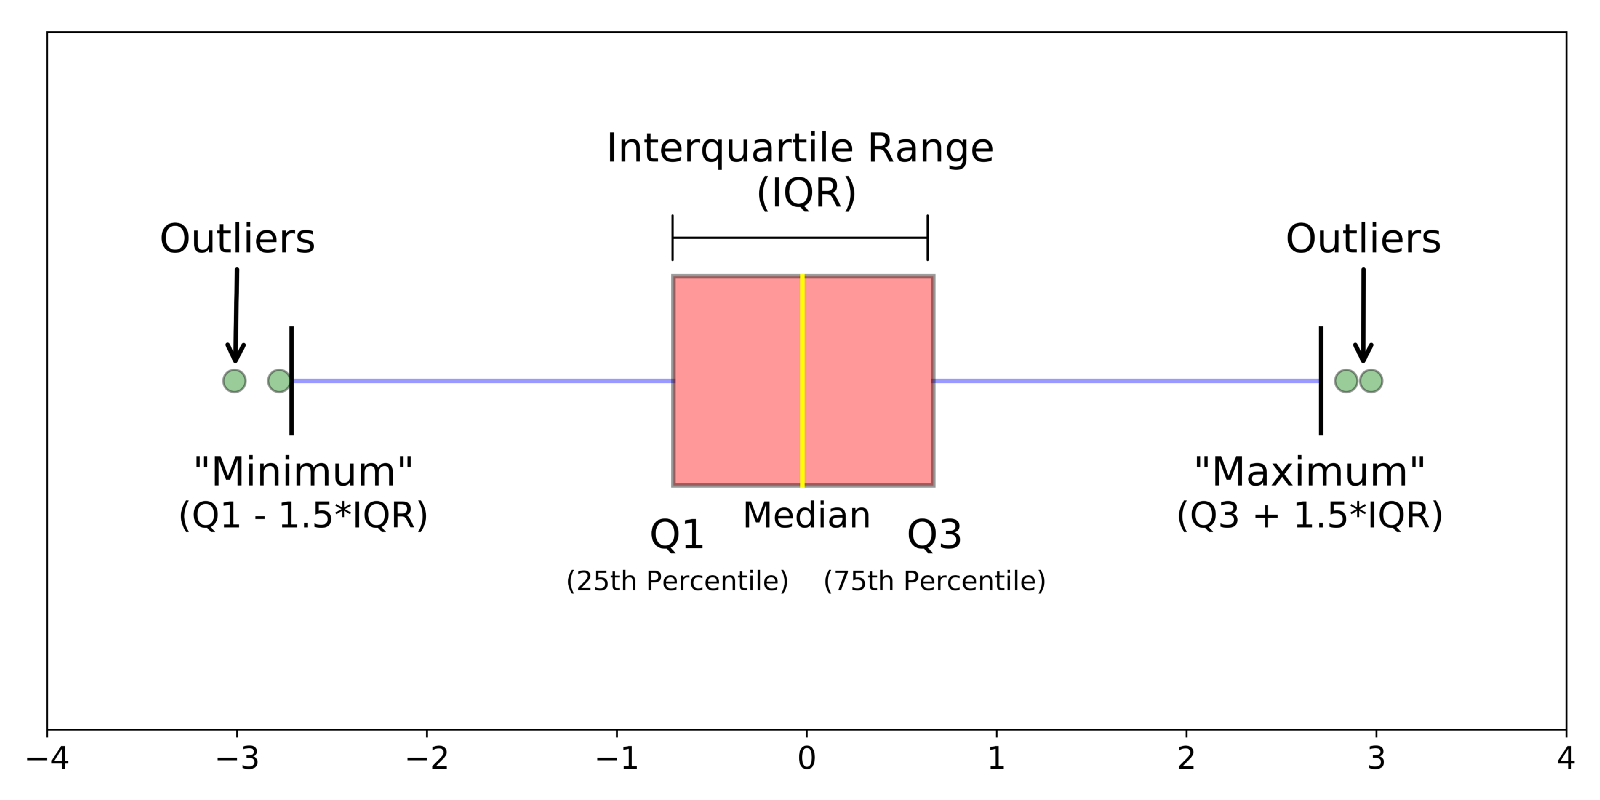

Source: https://spatiallychallenged.com/2019/05/31/box-and-whisker-plots/ 

In [ ]:
# Visualisation using a box plot (Seaborn)
sns.boxplot(data=tips, x='tip', y='day', hue='sex');

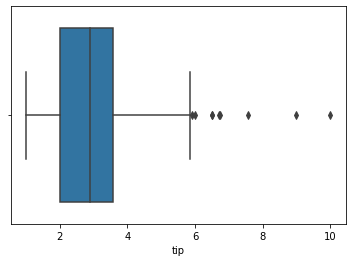

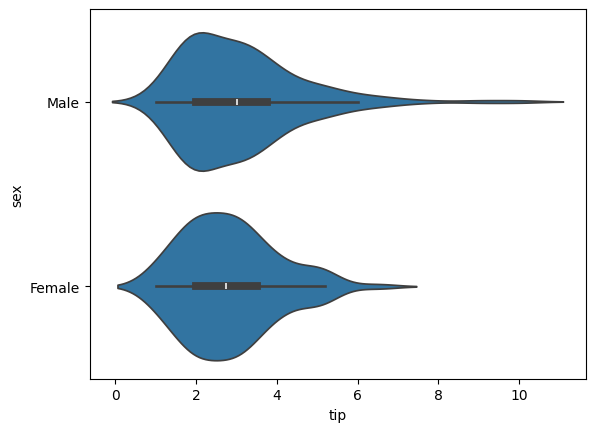

In [17]:
# Violin plot (Seaborn)
sns.violinplot(data = tips, x = "tip", y='sex');

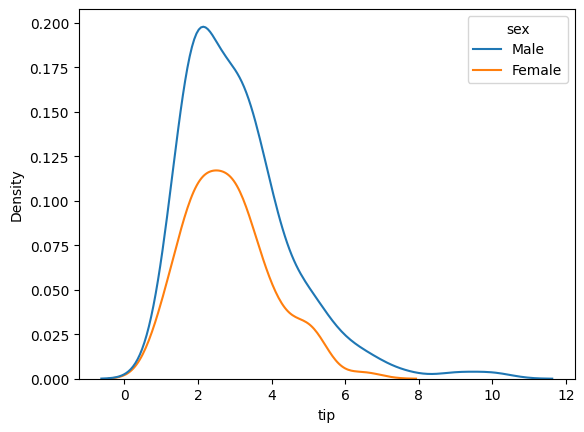

In [16]:
sns.kdeplot(data=tips, x='tip', hue='sex');

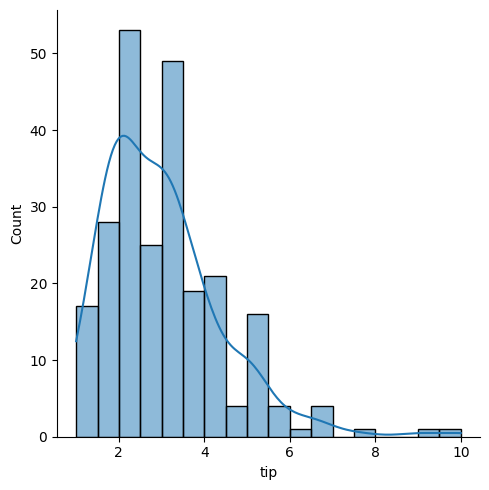

In [18]:
sns.displot(data=tips, x='tip', kde=True);

## Centraliteit en verspreidingsproblemen

In [ ]:
# Centrality and dispersion deasures
# Mean, standard deviation & friends
print(f"Mean:                {tips['tip'].mean()}")
print(f"Standard deviation:  {tips['tip'].std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {tips['tip'].var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {tips['tip'].skew()}")
print(f"Kurtosis:            {tips['tip'].kurtosis()}")

# Median & co
print(f"Minimum:   {tips['tip'].min()}")
print(f"Median:    {tips['tip'].median()}")
print(f"Maximum:   {tips['tip'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", tips['tip'].quantile(percentiles))
print("Inter Quartile Range:", tips['tip'].quantile(.75) - tips['tip'].quantile(.25))
# of stats.iqr(tips.tip)
print(f"Range :    {tips['tip'].max() - tips['tip'].min()}")


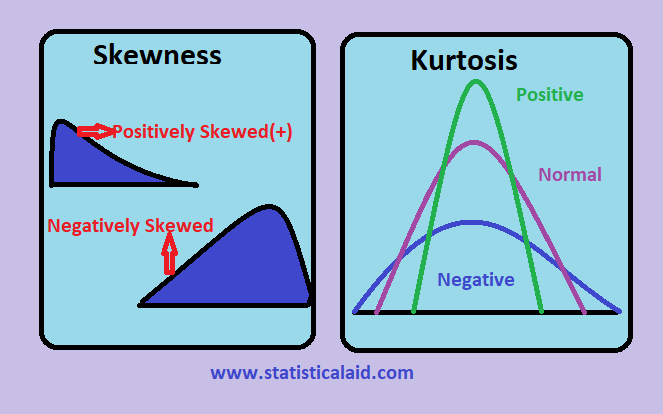

In [ ]:
# Variance, standard deviation, 
a = np.array([1,2,3,4,5])

print(f"Population variance with numpy  : {np.var(a)}")
print(f"Sample variance with numpy  : {np.var(a, ddof=1)}")
print(f"Standard deviation population: {np.std(a)}")
print(f"Standard deviation sample    : {np.std(a, ddof=1)}")
# altijd ddof=1 gebruiken bij numpy (kan ook geen kwaad bij pandas)

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `DataSize` and `PersistenceType`

In [ ]:
print(f"Mean {android['Time'].mean()}")
print(f"STD  {android['Time'].std()}")

print(f"Mean {android.groupby('DataSize')['Time'].mean()}")
print(f"std {android.groupby('DataSize')['Time'].std()}")

print(f"Mean  {android.groupby(['DataSize','PersistenceType'])['Time'].mean()}")
print(f"STD  {android.groupby(['DataSize','PersistenceType'])['Time'].std()}")

# Module 3: De centrale limietstelling

## Axiomas en regels van kansverdeling

- Een kans kan niet negatief zijn, en het totaal van alle kansen is 1
- $𝑃(𝐴 ∩ 𝐵)$ is wat ze gemeenschappelijk hebben delen door de totale verzameling
- When $𝐴$ and $𝐵$ are disjoint events (i.e. $𝐴 ∩ 𝐵 = ∅$) then it holds that $𝑃(𝐴 ∪ 𝐵) = 𝑃(𝐴) + 𝑃(𝐵)$. This is called the **sum rule**.
- Two events 𝐴 and 𝐵 are **independent** when $𝑃(𝐴 ∩ 𝐵) = 𝑃(𝐴)𝑃(𝐵)$

### Voorbeeld

Data about age of males and females in a small rural area are shown in the table.  

|       | Under 35 | 35 and over |
|:------| :------: | :---------: |
|Male   |    345   |     380     |
|Female |    362   |     472     |

A person from this area is chosen at random. Let _M_ be the event that the person is male and let _Y_ be the event that the person is under 35.

* Find P(_M_)
* Find P(_M_ and _Y_)
* Are _M_ and _Y_ independent events? Justify your answer.
* Given that the person chosen is under 35, find the probability that the person is female.

In [ ]:
Total = 345+380+362+472
print(f"P(M): ", (345+380) / Total, 725/1559)
print(f"P(M and Y): ", ((345+380) / Total) * ((345+362) / Total), "!=", 345/Total )
print(f"P(F|Y): ", 362/(345+362))

## Expectation of a discrete random variable

Members of a public library may borrow up to five books at any one time. The number of books borrowed by a member on each visit is a random variable, $X$, with the following probability distribution:

$X$  | 0 | 1 | 2 | 3 | 4 | 5
---|---|---|---|---|---|---
P(X = x) | $0.24$ |  $0.12$ |  $0.14$ |  $0.3$ |  $0.05$ |  $0.15$

Find the expected value of $X$.

In [26]:
print(f"X = ", 0*0.24 + 1*0.12 + 2*0.14 + 3*0.3 + 4*0.05 + 5*0.15)

X =  2.25


## de normaal verdeling

μ= gemiddelde  
σ= standaarafwijking

We can generalize this code for the normal distribution. As an example we take $X \sim Nor(\mu = 5, \sigma = 1.5)$. All points of interest on the Gauss curve are located at most 4 standard deviations left or right of the mean. Consequently, that's how we're going to calculate our x-values. The `pdf()`-function allows us to specify mean and standard deviation as parameters.

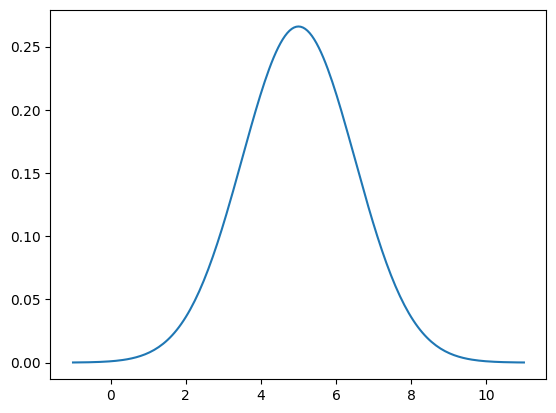

In [24]:
m = 5    # Gemiddelde
s = 1.5  # Standaardafwijking
x = np.linspace(m - 4 * s, m + 4 * s, num=201)
plt.plot(x, stats.norm.pdf(x, loc=m, scale=s))

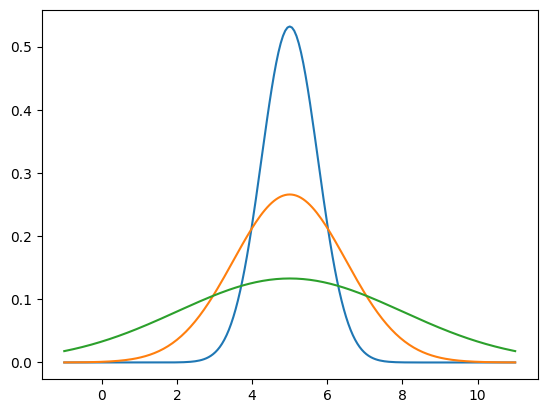

In [25]:
# Waarschijnlijkheidsdichtheid van een normale verdeling met verschillende standaard
# afwijkingen
m = 5    # Mean
x = np.linspace(m - 4 * s, m + 4 * s, num=201)

plt.plot(x, stats.norm.pdf(x, loc=m, scale=.75))
plt.plot(x, stats.norm.pdf(x, loc=m, scale=1.5))
plt.plot(x, stats.norm.pdf(x, loc=m, scale=3))

### Histogram met theoretische kansdichtheid

Het volgende voorbeeld laat zien hoe u een histogram van normaal verdeelde gegevens plot, waarbij de theoretische kansdichtheidsfunctie als een lijngrafiek wordt gesuperponeerd.

In [ ]:
# Generate 250 random numbers, following a normal distribution
n = 250
observations = np.random.normal(loc=m, scale=s, size=n)

# Plot histogram, without probability density
obs_hist = sns.histplot(observations, kde=True)

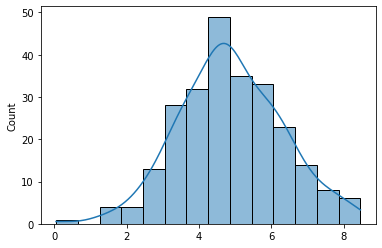

In [ ]:
# histogram with observations
obs_hist = sns.histplot(observations, stat = "density", kde=True)
# X-axis values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Probability density for the X-values
dist_y = stats.norm.pdf(dist_x, m, s)

# Plot the Gayss curve superimposed on the histogram
obs_hist.plot(dist_x, dist_y, 'red', lw=2)

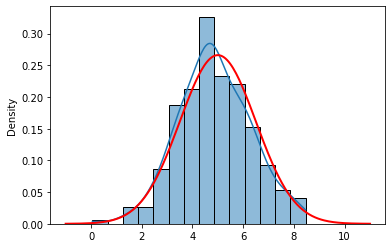

##  Kansverdeling in de normale verdeling

For a normal distribution with mean m and standard deviation s:

| Function                        | Purpose                         |
| :---                            | :---                            |
| `norm.pdf(x, loc=m, scale=s)`   | Probability density at $x$      |
| `norm.cdf(x, loc=m, scale=s)`   | Left-tail probability 𝑃(𝑋 < x)  |
| `norm.sf(x, loc=m, scale=s)`    | Right-tail probability 𝑃(𝑋 > x) |
| `norm.isf(1-p, loc=m, scale=s)` | p% of observations are expected to be lower than result    |

stel de notatie = $P(X > 6.5)$ dan gebruiken we volgende code

In [ ]:
#deze waarden zijn gegeven
m = 5
s = 1.5
stats.norm.sf(6.5, m, s)

we kunnen dit ook voorstellen met een grafiek

In [ ]:
# Left tail probability plot

# X-values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)
# Fill the area left of x
plt.fill_between(dist_x, 0, dist_y, where=dist_x <= x, color='lightblue')
# Show the mean with an orange line
plt.axvline(m, color="orange", lw=5)
# Show x with a green line
plt.axvline(x, color="green")

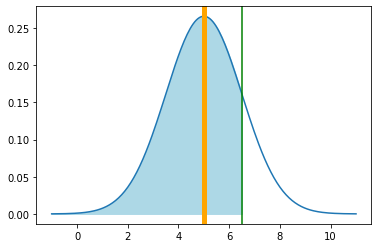

stel de notatie = $P(X < 6.5)$ dan gebruiken we volgende code


In [ ]:
#deze waarden zijn gegeven
m = 5
s = 1.5
stats.norm.cdf(6.5, m, s)

stel de notatie = $P(2< X < 6.5)$ dan gebruiken we volgende code


In [ ]:
stats.norm.cdf(6.5, loc=m, scale=s) - stats.norm.cdf(2, loc=m, scale=s)))

stel ze vragen: Tussen welk interval, symmetrisch rond het gemiddelde, zal je 50% van de waarnemingenvinden? (voorbeeld examen)

In [ ]:
print("(Ondergrens) ~= %.3f" % stats.norm.isf(1-0.25, m, s))
print("(Bovengrens) ~= %.3f" % stats.norm.isf(0.25, m, s))

## Betrouwbaarheidsintervallen
Een betrouwbaarheidsinterval is een schatting in de vorm van een gebied waarbinnen u verwacht dat het onbekende populatiegemiddelde met een bepaald betrouwbaarheidsniveau is.

Laten we zeggen dat we n = 100 waarnemingen van Superman's reactiesnelheid hebben en we krijgen een steekproefgemiddelde van 5,2 ms. We nemen aan dat we de werkelijke standaarddeviatie van zijn reactiesnelheid kennen en dat deze 1,5 ms is.

Om een betrouwbaarheidsinterval te bepalen, gaan we als volgt te werk:

1. We nemen het steekproefgemiddelde als initiële schatting en kiezen een betrouwbaarheidsniveau, bijvoorbeeld $1 - \alpha = 0.95$ (or 95%).
2. We vinden dan de z-score waartussen 95% van alle waarden bij een standaard normale verdeling liggen.
3. Hiermee bepalen we de waarden links en rechts van het steekproefgemiddelde waartussen we verwachten dat 95% van de waarden zal vallen voor de kansverdeling die we krijgen uit de centrale limietstelling.

z-score: 1.95996
Confidence interval: [4.9060, 5.4940]
(np.float64(4.906005402318992), np.float64(5.4939945976810085))


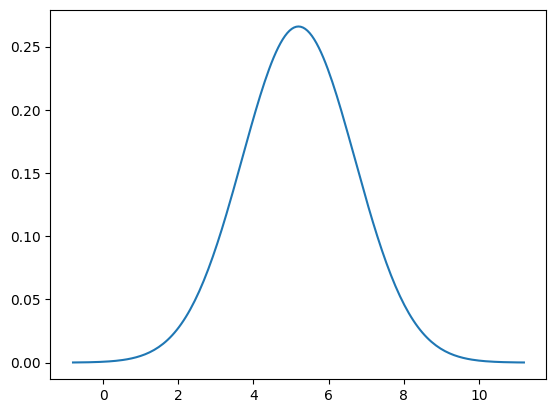

In [37]:
# Als n > 30 en als de population std gegeven is -> anders t gebruiken

# Step 1.
m = 5.2      # Sample mean
s = 1.5      # Population standard deviation
n = 100      # Sample size
alpha = .05  # 1 - alpha is the confidence level
se = s/np.sqrt(n) # Calculate the standard error (SE) of the mean: this quantifies the uncertainty in the sample mean estimate.

# Step 2.
z = stats.norm.isf(alpha/2)
print("z-score: %.5f" % z)

# Step 3.
lo = m - z * se
hi = m + z * se
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

# Of confidence interval:
print(stats.norm.interval(1-alpha, loc=m, scale=se))

# X-values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

We concluderen met een betrouwbaarheidsniveau van 95% dat de reactiesnelheid van Superman ergens tussen 4,91 en 5,49 ms ligt.

## Betrouwbaarheidsintervallen voor kleine steekproeven


For a $t$-distribution with df degrees of freedom: (df = degrees of freedom)  

| **Function**    | **Purpose** |
| :---                     | :--- |
| `stats.t.pdf(x, df=d)`   | Probability density for $x$    |
| `stats.t.cdf(x, df=d)`   | Left-tail probability 𝑃(𝑋 < x) |
| `stats.t.sf(x, df=d)`    | Right-tail probability 𝑃(𝑋 > x)    |
| `stats.t.isf(1-p, df=d)` | p% of observations are expected to be lower than this value    | 


Als we een kleine steekproef hebben ( n<30 ), gaat de veronderstelling die we in de centrale limietstelling hebben gemaakt niet langer op. In dat geval kunnen we de normale verdeling niet gebruiken.

Er is echter nog steeds een manier om een ​​betrouwbaarheidsinterval te construeren via de zogenaamde Student-t-verdeling. Deze verdeling lijkt op de normale verdeling in die zin dat de kansdichtheidsfunctie eruitziet als een Gauss-curve. De Student-t-verdeling houdt echter ook rekening met de steekproefomvang n, dus u moet deze specificeren. De dichtheidsfunctie krijgt een extra parameter genaamd het aantal vrijheidsgraden (afgekort df of dof) en is gelijk aan n−1 .

Hoe kleiner de vrijheidsgraden, hoe "platter" de curve en hoe groter de verkregen betrouwbaarheidsintervallen. Dit vertegenwoordigt de grotere onzekerheid die we krijgen vanwege de kleine steekproefomvang. Hoe groter de steekproefomvang n is, hoe dichter de curve die van de normale verdeling zal benaderen.

In onderstaande grafiek vind je de dichtheidsfunctie voor de Student-t-verdeling voor verschillende vrijheidsgraden:

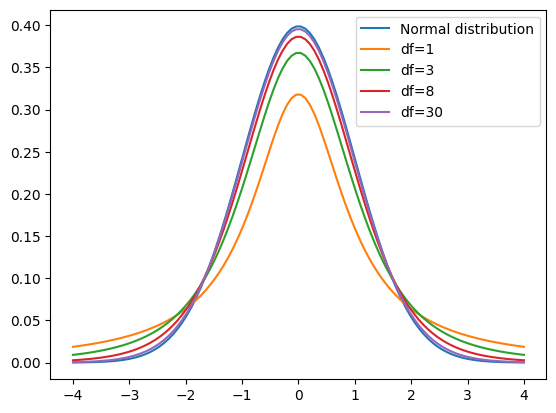

In [29]:
x = np.linspace(-4, +4, num=100)
fig, tplot = plt.subplots(1, 1)
tplot.plot(x, stats.norm.pdf(x, 0, 1), label="Normal distribution")
tplot.plot(x, stats.t.pdf(x, 1), label="df=1") 
tplot.plot(x, stats.t.pdf(x, 3), label="df=3")
tplot.plot(x, stats.t.pdf(x, 8), label="df=8")
tplot.plot(x, stats.t.pdf(x, 30), label="df=30")
tplot.legend(loc='best')

Om dit te illustreren herhalen we het eerdere voorbeeld, maar nemen aan dat de steekproefomvang slechts 15 was.

In [41]:
# Als n < 30 OF als de population std niet gegeven is -> dan bereken je s adhv sample.std()

# Step 1.
m = 5.2      # Sample mean
s = 1.5      # Population standard deviation
n = 15       # Sample size
alpha = .05  # 1 - alpha is the confidence level
se = s / np.sqrt(n)

# Stap 2.
t = stats.t.isf(alpha/2, df = n - 1)
print("t-score: %.5f" % t)

# Stap 3.
lo = m - t * se
hi = m + t * se
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

# Of confidence interval
stats.t.interval(1-alpha, df = n - 1, loc=m, scale=se)

t-score: 2.14479
Confidence interval: [4.3693, 6.0307]


(np.float64(4.369327687653038), np.float64(6.0306723123469625))

## Statistical Hypothesis testing

## De Z-test
De z-test wordt gebruikt om een aanname over het (onbekende) populatiegemiddelde te bevestigen of te weerleggen op basis van een voldoende grote steekproef.

### De rechtszijdige z -test
Algemeen wordt aangenomen dat superhelden elke dag gemiddeld $\mu = 3.3$ mensen redden. Onderzoekers willen deze veronderstelling controleren en een steekproef van 30 superhelden uitvoeren. In deze steekproef is het gemiddelde $\overline{x}=3.483$ . We kunnen dus veronderstellen dat superhelden gemiddeld meer reddingen uitvoeren.

De standaarddeviatie in de populatie wordt bekend verondersteld en is σ=0,55 .

De testprocedure verloopt dan als volgt:  
**Stap 1.** Formuleer de hypothesen:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$  

**Stap 2.** Kies een significantieniveau, b.v. $\alpha = 0.05$

In [42]:
# Properties of the sample:
n = 30      # sample size
m = 3.3    # hypothetical population mean (H0)
s = 0.55    # population standard deviation (assumed to be known)
m_sample = 3.483  # sample mean
s_sample = s / np.sqrt(n)
alpha = 0.05    # significance level (chosen by the researcher)



**Stap 3.**   
Bepaal de waarde van de toetsstatistiek, in dit geval $\overline{x} = 3.483$

**Stap 4.**  
bepaal the p-value and verwerp $H_0$ als $p < \alpha$.

In [45]:
p = stats.norm.sf(m_sample, loc=m, scale=s_sample)
print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(alpha, loc=m, scale=s / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

p-value: 0.03420
p < alpha: reject H0
Critical value g ≃ 3.465
sample mean = 3.483 > g = 3.465: reject H0


een grafiek van dit voorbeeld: 

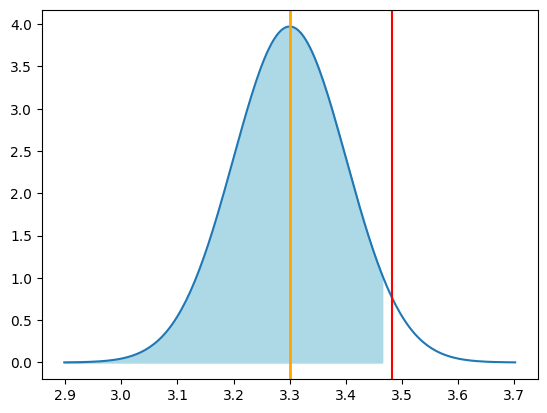

In [46]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m - 4 * s_sample, m + 4 * s_sample, num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s_sample)
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue')

### The linkerzijdige $z$-test
Laten we aannemen dat het resultaat van de steekproef $\overline{x} = 3.117$ was. In dat geval hebben we redenen om aan te nemen dat het populatiegemiddelde lager is dan 3,3. We kunnen dit verifiëren met een linkszijdige z-test.

**Stap 1.** Formuleer de hypothesen:

- $H_0: \mu = 3.3$
- $H_1: \mu < 3.3$  

**Stap 2.** Kies een significantieniveau, b.v. $\alpha = 0.05$

In [51]:
# Properties of the sample:
n = 40              # Sample size
m = 351.2          # (Hypothetical) population mean
s = 4.1         # Population standard deviation (assumed to be known)
m_sample = 350.4    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

**Stap 3.**   
Bepaal de waarde van de toetsstatistiek, in dit geval $\overline{x} = 350.4$

**Stap 4.**  
bepaal the p-value and verwerp $H_0$ als $p < \alpha$.

In [52]:
# Pay attention! Use cdf() instead of sf()! Why?
p = stats.norm.cdf(m_sample, loc=m, scale=s/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < a, reject H0")
else:
    print("p > a, do not reject H0")

# Critical value according to the formula in the lecture slides
# g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(1-alpha, loc=m, scale=(s / np.sqrt(n)))
print("Critical value g ≃ %.3f" % g)
if (m_sample > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (m_sample, g))

p-value: 0.10859
p > a, do not reject H0
Critical value g ≃ 350.134
sample mean = 350.400 > g = 350.134: do not reject H0


In dit geval ligt de kritische waarde g links van het gemiddelde. Rechts van g mag je H0 (acceptatiegebied) niet verwerpen, links wel (kritiek gebied).

We kunnen concluderen dat als we aannemen dat  $H_0$ waar is, de kans om een steekproef te trekken uit deze populatie met deze specifieke waarde voor $\overline{x}$ inderdaad erg klein is. Met het gekozen significantieniveau kunnen we de nulhypothese verwerpen.

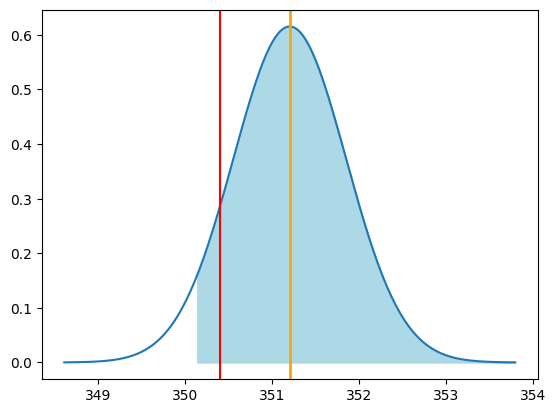

In [53]:
# Gauss-curve:
# X-values
dist_x = np.linspace(m - 4 * s/np.sqrt(n), m + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, m, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(m, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue')

### The two-tailed $z$-test
When we don't want to test whether the population mean is either greater or lower than a hypothetical value, but only want to know if the sample mean is "close enough", we can use a two-tailed $z$-test. 
**Step 1.** Formulate the hypotheses:

- $H_0: \mu  =  351.2$
- $H_1: \mu \ne 351.2$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Determine the test statistic. Assume the mean quantity per jar is found to be 351.4g.

$$\overline{x} = 351.4$$

**Step 4.** Calculate the $p$-value and reject $H_0$ if $p < \alpha/2$

In [54]:
# Properties of the sample:
n = 40              # Sample size
mu = 351.2          # (Hypothetical) population mean
sigma = 4.1         # Population standard deviation (assumed to be known)
m_sample = 351.4    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

In [55]:
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))
print("p-waarde: %.5f" % p)
if(p < alpha/2):
    print("p < alpha/2, reject H0")
else:
    print("p > alpha/2, do not reject H0")

p-waarde: 0.37885
p > alpha/2, do not reject H0


In dit geval hebben we twee kritische waarden: g1 aan de linkerkant van het gemiddelde en g2 aan de rechterkant. Het acceptatiegebied heeft nog steeds oppervlakte 1−α en het kritieke gebied heeft oppervlakte α .

In [56]:
g1 = mu - stats.norm.isf(alpha/2) * sigma / np.sqrt(n)
g2 = mu + stats.norm.isf(alpha/2) * sigma / np.sqrt(n)

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < m_sample and m_sample < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % m_sample)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % m_sample)

Acceptance region [g1, g2] ≃ [349.929, 352.471]
Sample mean = 351.400 is inside acceptance region: do not reject H0


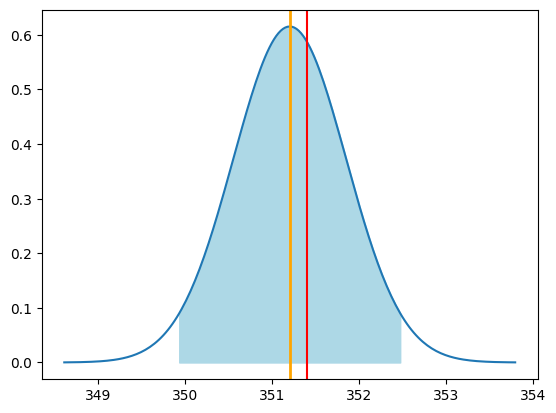

In [57]:
# Gauss-curve
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=mu, scale=sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=mu, scale=sigma/np.sqrt(n))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue');

**Step 5** Draw conclusions

The obtained sample mean turns out to be sufficiently probable. We cannot rule out a random sampling error. Or, in other words, we *cannot* reject the null hypothesis here. From the sample, we cannot conclude that the machine is not working correctly.

## Student's $t$-test

The $z$-test can only be used under specific conditions:

- The sample needs to be random  
- The sample size needs to be sufficiently large ($n \geq 30$)
- The test statistic needs to have a normal distribution  
- The standard deviation of the population, $\sigma$, is known

Sometimes these assumptions will not hold and in this case we can not use the $z$-test! If the variable is normally distributed, you can use Student's $t$-test.

### Rechtszijdige $t$-test
This is a *right-tailed* test, because we are testing whether the score of the new textbook is higher than the score of the old textbook. The testing procedure then runs as follows:

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 5.2$ (the score isn't higher)
- $H_1: \mu > 5.2$ (the score is higher)

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

**Step 3.** Calculate the test statistic $\overline{x}$

In [58]:
scores = [6, 3, 6, 7, 6, 10, 6, 8, 7, 9, 3, 6, 4, 6, 8, 9, 5, 4, 6, 4, 6, 8, 10, 5, 4, 6, 4, 6, 6, 4, 5, 7, 8, 7, 5, 4, 8, 4, 5, 10, 7]
n = len(scores)
mu = 5.2
s = np.std(scores, ddof = 1)  # the standard deviation of the population is unknown
m_sample = np.mean(scores)
alpha = 0.05

print(f"Sample mean: {m_sample}")

Sample mean: 6.146341463414634


**Step 4.** Determine the $p$-value and do not reject $H_0$ if $p > \alpha$.

In [60]:
p = stats.t.sf(m_sample, loc = mu, scale = s / np.sqrt(n), df = n - 1)
print(f"p-value: {p}")
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.001416386450584406
p < alpha: reject H0


Om de kritische waarde te berekenen, gebruiken we de functie isf() met $n-1$ graden
van vrijheid.

In [62]:
g = stats.t.isf(alpha, loc = mu, scale = s / np.sqrt(n), df = n - 1)
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 5.701
sample mean = 6.146 > g = 5.701: reject H0


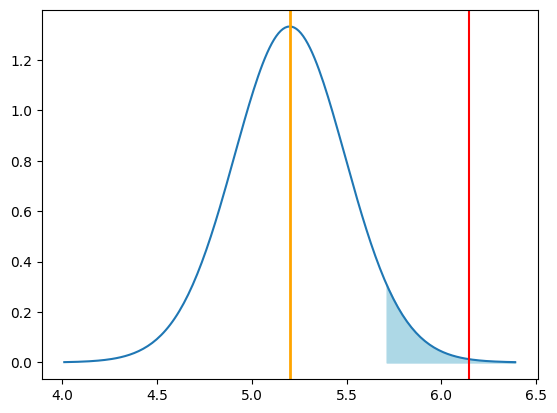

In [63]:
# Gauss-curve
# X-values
dist_x = np.linspace(mu - 4 * s/np.sqrt(n), mu + 4 * s/np.sqrt(n), num=201)
# Y-values
dist_y = stats.t.pdf(dist_x, loc=mu, scale=s/np.sqrt(n), df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue');

### two-tailed t-test 

When to use ttest_1samp?
- You have one sample of data.
- You want to test if its mean significantly differs from a known or hypothesized population mean.
- The data is assumed to be normally distributed (or approximately normal for large samples).
- The standard deviation of the population is not known

In [64]:
study_times = [18,22,19,21,23,20,17,22,19,18,21,20,16,24,19]
alpha = 0.05
mu = 20

t_stat, p_val = stats.ttest_1samp(a=study_times, popmean=mu, alternative='two-sided')
print("Sample mean        : %.3f" % np.mean(study_times))
print("t-score            : %.3f" % t_stat)
print(f"p-value           : {p_val}")

Sample mean        : 19.933
t-score            : -0.115
p-value           : 0.9103055898392006


Als je een eenzijdige test wilt doen, kun je de juiste conclusie afleiden uit de resultaten van de functie. De t-score is negatief als het steekproefgemiddelde links van m0 ligt. In dat geval zou u een linkszijdige toets uitvoeren. In een eenzijdige toets delen we het resultaat voor p door 2 en vergelijken met α . De beslissing wordt dan:

- Voor een rechtszijdige toets: als $p/2 < \alpha$ en $t > 0$ kunnen we de nulhypothese verwerpen

- Voor een linkszijdige toets: als $p/2 < \alpha$ en $t < 0$ kunnen we de nulhypothese verwerpen  

**Remarks**

There is no similar function as `ttest_1samp()` for the $z$-test. In practice, the $z$-test is rarely used because the conditions for its use are rarely met. In particular, the assumption that the population variance is known is not realistic. The $t$-test is more versatile and can be used in a wider range of situations.

As a conclusion:

**When to use the $z$-test?**
- in case of a large sample (no matter which distribution) or a small sample if the underlying distribution is the normal distribution

ánd

- if the variance or standarddeviation of the population is known


**When to use the $t$-test?**
- if the underlying distribution is the normal distribution

ánd

- if the variance or standarddeviation of the population is unknown

## Errors in Hypothesis Tests

**Type I error** (false positive)  
The null hypothesis is actually true and you reject it.  
Example: A COVID test wrongly indicates a person is infected when they are actually healthy.

**Type II error** (false negative)    
You accept the null hypothesis and it was not true.  
Example: A COVID test wrongly indicates a person is healthy when they are actually infected.

P(type I error) = 𝛼 (= significance level)  -> meestal 0.05
P(type II error) = 𝛽  
Calculating 𝛽 is not trivial, but if 𝛼 ↘ then 𝛽 ↗

# Module 4: Bivariate analyse - 2 kwalitatieve variabelen

## Contingentietabellen en visualisatietechnieken

Stel dat we willen weten of vrouwen en mannen (variabel geslacht) binnen de steekproef verschillend hebben geantwoord op een enquêtevraag met een Likert-schaal (variabele enquête).

Als de verhoudingen van de antwoorden (1 tot 5) voor vrouwen en mannen ongeveer gelijk zijn, zeggen we dat er geen verband is tussen de twee variabelen. Als er een significant verschil is, dan is er een verband. Nu is natuurlijk de vraag wanneer het verschil groot genoeg is om als significant te worden beschouwd...

Een eerste stap is het berekenen van een contingentietabel. We tellen meteen de marginale totalen op:

In [65]:
# Read dataset + data preparation
rlanders = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])
rlanders.Gender = rlanders.Gender.astype('category')
likert_scale = CategoricalDtype(categories=[1,2,3,4,5], ordered=True)
rlanders.Survey = rlanders.Survey.astype(likert_scale)
rlanders.info()
rlanders.Survey.dtype

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 1 to 250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  250 non-null    category
 1   Money   250 non-null    int64   
 2   Days    250 non-null    int64   
 3   Months  250 non-null    int64   
 4   Count   250 non-null    int64   
 5   Survey  250 non-null    category
dtypes: category(2), int64(4)
memory usage: 10.6 KB


CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64)

In [66]:
pd.crosstab(rlanders.Survey, rlanders.Gender, margins=True)

Gender,Female,Male,All
Survey,,,
1,0,4,4
2,17,45,62
3,23,91,114
4,12,53,65
5,0,5,5
All,52,198,250


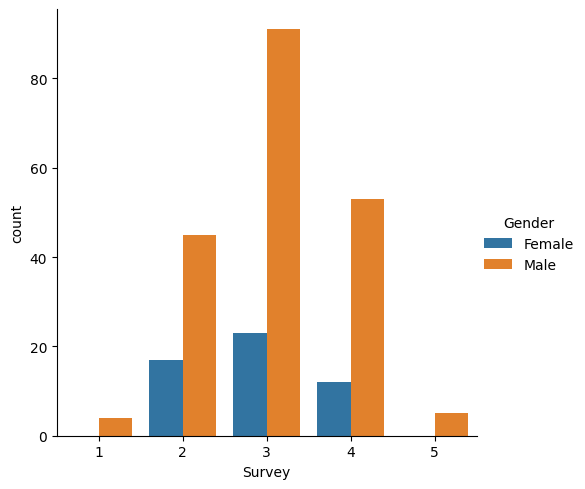

In [67]:
# Clustered bar chart
sns.catplot(data=rlanders, x='Survey', hue='Gender', kind='count')

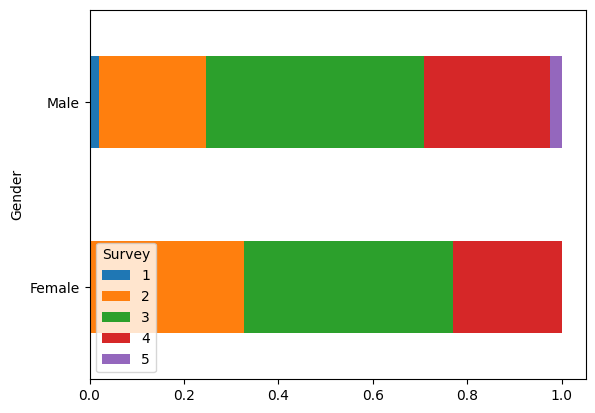

In [68]:
#Stacked bar chart
# Contingency table without the margins
observed_p = pd.crosstab(rlanders.Gender, rlanders.Survey, normalize='index')

# Horizontally oriented stacked bar chart
observed_p.plot(kind='barh', stacked=True);

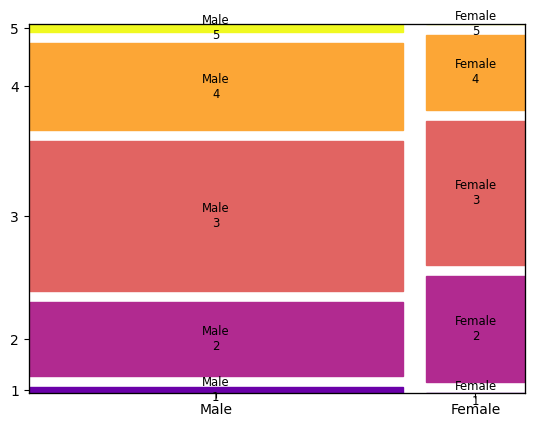

In [70]:
#Mosaic diagram
import matplotlib as mpl

plasma_colors = mpl.colormaps['plasma']

props = lambda key: {'color': plasma_colors(int(key[1])/5)}

mos_gender_survey = mosaic(
       data=rlanders.sort_values(by=['Survey']),
       index=['Gender', 'Survey'],
       gap=0.05, properties=props);

## Chi-squared and Cramers V
Chi-kwadraat ( χ2 ) en Cramer's V zijn statistieken die ons kunnen helpen om te bepalen of er een verband is tussen twee kwalitatieve (categorische) variabelen.

De redenering gaat als volgt: als er geen verband is tussen Gender en Survey, dan verwachten we dat de verhoudingen van de waarden van Survey hetzelfde zijn voor alle waarden van Gender. Met andere woorden, voor zowel vrouwen als mannen zal hetzelfde percentage respondenten hetzelfde antwoord geven op de vraag.

In [ ]:
observed = pd.crosstab(rlanders.Survey, rlanders.Gender)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f'Number of observations: {n}')

In [ ]:
expected = np.outer(row_sums, col_sums) / n
expected

In [ ]:
expected - observed

In [ ]:
diffs = (expected - observed)**2 / expected
print(diffs)

In [76]:
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

χ² ≈ 4.255


In [77]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)

0.13046762087242633


In [78]:
#korte functie
stats.contingency.association(observed, method='cramer')

0.13046762087242636

| Cramér's V | Interpretation          |
| :---:      | :---                    |
| 0          | No association          |
| 0.1        | Weak association        |
| 0.25       | Moderate association    |
| 0.50       | Strong association      |
| 0.75       | Very strong association |
| 1          | Complete association    |

So our result for Cramér's V indicates a fairly weak association. Note that Cramér's V is known to be too optimistic about the association between two variables in certain cases. There is a modified formula for eliminating this bias, but it is beyond the scope of this course.

There is, however, another way to determine whether the chi-square is large enough to conclude that there is a relationship, namely by means of a statistical test.

## The chi-squared test for independence

To answer the question of when the value of chi-square is sufficient to assume an association between two variables, we can use the *chi-square independence test*.

### The chi-squared distribution

The value of $\chi^2$ follows a specific stochastic distribution that is called the $\chi^2$-distribution. Just like with the Student-t distribution, the shape of the probability density function depends on the degrees of freedom, which in this context is $df = (r-1)\times(k-1)$ (with $r$ the number of rows in the contingency table and $k$ the number of columns).

The code below plots the probability density function of the $\chi^2$-distribution for a number of degrees of freedom:

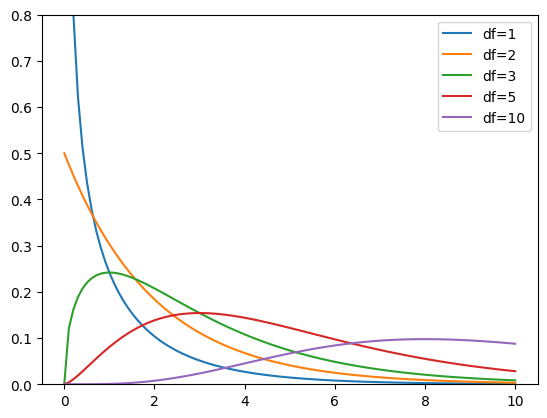

In [79]:
# Plot of the chi-squared distribution for different degrees of freedom
x = np.linspace(0, 10, num=100)
fig, tplot = plt.subplots(1, 1)
tplot.set_ylim([0, 0.8])
tplot.plot(x, stats.chi2.pdf(x, 1), label="df=1") 
tplot.plot(x, stats.chi2.pdf(x, 2), label="df=2") 
tplot.plot(x, stats.chi2.pdf(x, 3), label="df=3")
tplot.plot(x, stats.chi2.pdf(x, 5), label="df=5")
tplot.plot(x, stats.chi2.pdf(x, 10), label="df=10")
tplot.legend(loc='best')

### Test procedure X2
Formally, the procedure of the $\chi^2$ test for independence runs as follows:

1. Formulate the hypotheses:
   - $H_0$: There is no association between the variables (the differences between observed and expected values are small)
   - $H_1$: There is an association between the variables (the differences are large)
2. Choose significance level $\alpha$
3. Calculate the value of the test statistic in the sample (here: $\chi^2$).
4. Use one of the following methods (based on the degrees of freedom $df = (r-1) \times (k-1)$):
   1. Determine critical value $g$ so $P(\chi^2 > g) = \alpha$
   2. Calculate the $p$-value
5. Draw a conclusion based on the outcome:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

In Python, we can calculate this as follows:

In [80]:
# Zie Cramer's V voor het berekenen van chi_squared

alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)

print("Chi-squared        : %.4f" % chi_squared)
print("Degrees of freedom : %d" % dof)

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)

# Calculate p-value
p = stats.chi2.sf(chi_squared, df=dof)
print("p-value            : %.4f" % p)

Chi-squared        : 4.2555
Degrees of freedom : 4
Critical value     : 9.4877
p-value            : 0.3725


dit kan ook makkelijker...

In [81]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(rlanders.Survey, rlanders.Gender)
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 4.2555
Degrees of freedom: 4
P-value           : 0.3725


grafiekje: 

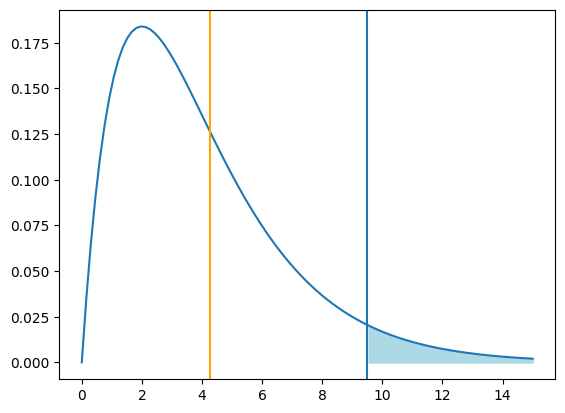

In [82]:
# Is there an association between Gender and Survey?

# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=4)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

We zien dat χ2 ruim binnen het acceptatiegebied ligt. De p -waarde is ook groter dan α . Bijgevolg kunnen we de nulhypothese niet verwerpen en concluderen dat er op basis van deze steekproef geen reden is om aan te nemen dat er een significant verschil is tussen de antwoorden van vrouwen en mannen op de onderzoeksvraag.

## Goodness-of-fit test
Stel dat we in een steekproef van superhelden bijhouden welk type ze zijn en dat we ook weten hoe vaak elk type voorkomt in de hele populatie (in procenten). Hieronder zijn de absolute frequenties in de steekproef $o_i$ en de verwachte relatieve frequenties $\pi_i$ in de populatie:

In [83]:
types =               ['mutant', 'human', 'alien', 'god', 'demon']
observed =   np.array([   127,      75,      98,     27,     73])
expected_p = np.array([   .35,     .17,     .23,    .08,    .17])

The question now is: is this sample representative of the population? Does each type occur in the sample in proportion to the expected percentage in the population as a whole?

### Test procedure

To answer these kinds of questions, a goodness-of-fit test is suitable. The procedure is as follows:

1. Formulate the hypotheses:
   - $H_0$: The sample is representative of the population, i.e. the frequency of each class within the sample corresponds well to that in the population.
   - $H_1$: The sample is *not* representative of the population, i.e. the differences with the expected frequencies are too large.
2. Choose significance level $\alpha$
3. Calculate the value of the test statistic in the sample (here: $\chi^2$).
4. Use one of the following methods (based on the degrees of freedom $df = (k-1)$ with $k$ the number of categories in the sample):
   1. Determine critical value $g$ so $P(\chi^2 > g) = \alpha$
   2. Calculate the $p$-value
5. Draw a conclusion based on the outcome:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

A plot of this case, including the calculation of $p$ and $g$:

In [84]:
alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 400
k = 5; df = 4
Chi-squared        χ² = 3.4679
Critical value      g = 9.4877
p-value             p = 0.4828


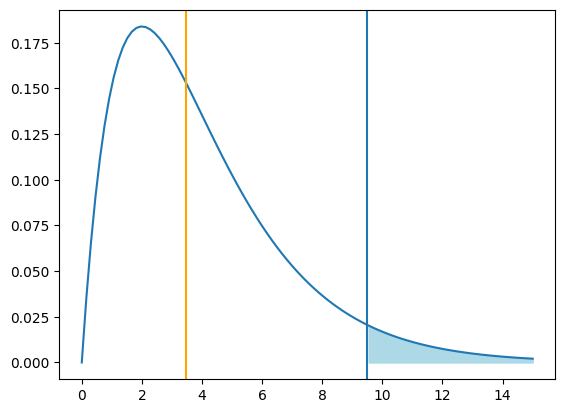

In [85]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

We zien dat χ2 in de steekproef links van de kritische waarde ligt, dus binnen het acceptatiegebied. Daarom kunnen we de nulhypothese niet verwerpen en concluderen dat de steekproef representatief is voor de populatie, tenminste tov. de soorten superhelden.

### oefening van het voorbeeld examen

U heeft onlangs monsters van drie producten aangeboden aan elke klant die uw bedrijf isbinnengekomen.  Vervolgens vroeg u welk product klanten het beste vonden.  U hebt dezevoorkeuren voor Product A, Product B en Product C vastgelegd in de dataset die hierondergegeven is. Zoek uit of de klanten al dan niet een uitgesproken voorkeur hadden voor  ́eén van deze producten.

In [ ]:
# (a)Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Weeszo specifiek mogelijk!
# Xhi**2 test - goodness of fit

# (b)Formuleer de nulhypothese en de alternatieve hypothese
# H0: de klaneten vonden de 3 producten even goed
# H1 : de klanten vonden de 3 producten niet evengoed

# (c)Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symboolen de waarde
observed = df.Choice.value_counts()
print(observed)
expected_p = np.array([1/3,1/3,1/3])

alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

print(f"p-waarde is {p}>>0.05 =. er is voldoende aanwijzing om de H0 hypothese te verwerpen")
print(f"χ²-waarde is {chi2}>>{g} =. er is voldoende aanwijzing om de H0 hypothese te verwerpen")



# (d)Bereken de p-waarde
# (e)Welke conclusie trek je?
# (f)Formuleer een antwoord op de onderzoeksvraag.
#de klanten hadden zeker niet evenveel voorkeur voor elk van de 3 producten

Product C    48  
Product B    36  
Product A     6  
Name: Choice, dtype: int64  
Significance level  ⍺ = 0.05  
Sample size         n = 90  
k = 3; df = 2  
Chi-squared        χ² = 31.2000  
Critical value      g = 5.9915  
p-value             p = 0.0000  
p-waarde is 1.6788275299956632e-07>>0.05 =. er is voldoende aanwijzing om de H0 hypothese te verwerpen  
χ²-waarde is 31.2>>5.991464547107983 =. er is voldoende aanwijzing om de H0 hypothese te verwerpen

## Gestandaardiseerde residuen

Na het uitvoeren van een chikwadraattoets is het vaak ook interessant om te weten in welke categorieën de grootste afwijkingen voorkomen. Je zou kunnen kijken naar de waarde $\frac{(o-e)^2}{e}$ voor elke cel in de contingentietabel (of vector), die wordt gebruikt bij de berekening van χ2 . Hieruit kun je echter niet zeggen in hoeverre de afwijkingen echt als "extreem" kunnen worden beschouwd. Hiervoor gebruiken we zogenaamde gestandaardiseerde residuen.

We introduceren dit concept aan de hand van een voorbeeld:

Stel dat een bepaald onderzoek kijkt naar gezinnen met 5 kinderen. Er wordt een steekproef genomen van 1022 gezinnen, die worden onderverdeeld in categorieën op basis van het aantal jongens in het gezin. De frequenties staan hieronder in een Pandas DataFrame die we handmatig gaan aanmaken en systematisch uitbreiden.

In [86]:
# Data frame with 2 columns:
#  - number of boys in the family (index)
#  - number of families in the sample with that number of boys
families = pd.DataFrame(
    np.array(
        [[0,  58],
         [1, 149],
         [2, 305],
         [3, 303],
         [4, 162],
         [5,  45]]),
    columns=['num_boys', "observed"])
families.set_index(['num_boys'])
n = families.observed.sum() # sample size

In [87]:
from scipy.special import binom # binomial-function

# probability for a boy
prob_boy = .5
# Add new colum to the data frame for the expected percentages
families['expected_p'] = binom(5, families.num_boys) * prob_boy**families.num_boys * prob_boy**(5-families.num_boys)
# Expected absolute frequencies in the sample:
families['expected'] = families['expected_p'] * n
families

,num_boys,observed,expected_p,expected
0,0,58,0.03125,31.9375
1,1,149,0.15625,159.6875
2,2,305,0.31250,319.3750
3,3,303,0.31250,319.3750
4,4,162,0.15625,159.6875
5,5,45,0.03125,31.9375


In [88]:
# Omdat de p-waarde zo klein is, checken vanwaar dat komt:
families['stdres'] = (families.observed - families.expected) / np.sqrt(families.expected * (1 - families.expected_p))
families

,num_boys,observed,expected_p,expected,stdres
0,0,58,0.03125,31.9375,4.685541
1,1,149,0.15625,159.6875,-0.920733
2,2,305,0.31250,319.3750,-0.970110
3,3,303,0.31250,319.3750,-1.105082
4,4,162,0.15625,159.6875,0.199223
5,5,45,0.03125,31.9375,2.348389


Standardised residuals are a measure of the extent to which a certain category is over- or under-represented in the sample. A value of 0 is given when the observed frequency is equal to the expected frequency. A negative value is given when there are fewer observations than expected and a positive value when there are more. As long as $r_i \in [-2, 2]$, we consider the differences to be random sampling errors. A value $r_i < -2$ indicates underrepresentation of this category, $r_i > 2$ indicates overrepresentation.

Thus, families with only girls and only boys are over-represented in the sample. In practice, researchers could choose to randomly remove a number of observations in these categories from the study, so that the sample becomes representative of the population.

Remark that there is a way to calculate standardized residuals using [`statsmodels.stats.contingency_tables.Table`](https://www.statsmodels.org/stable/generated/statsmodels.stats.contingency_tables.Table.html#statsmodels.stats.contingency_tables.Table). However, that only works with [contingency tables for two variables](https://www.statsmodels.org/stable/contingency_tables.html?highlight=residuals), not for this case with one variable.

## Cochran's rule
Een chikwadraattoets kan alleen goede resultaten geven als je genoeg waarnemingen hebt in elke categorie. De statisticus Cochran (1954) formuleerde een vuistregel om te bepalen wat er precies *genoeg* is op contingentietabellen groter dan 2x2:

- Alle verwachte waarden moeten minimaal 1 zijn
- Maximaal 20% van de verwachte waarden mag kleiner zijn dan 5

# Module 5 - Bivariate analyse: kwalitatief versus kwantitatief

In deze module bespreken we het geval waarin de onafhankelijke variabele kwalitatief is en de afhankelijke kwantitatief. Enkele typische voorbeelden van onderzoeksvraag in dit geval:

- Zijn binnen een bepaalde diersoort mannelijke individuen significant groter dan vrouwtjes?
- Beschermt een nieuw vaccin tegen de ziekte zoals het hoort?
- Verbetert een bepaalde studiemethode zoals "ophaaloefening" de leerresultaten (d.w.z. de cijfers van studenten)?  

In deze cursus behandelen we alleen het geval waarin we twee groepen vergelijken. Er zijn methoden om meer dan twee groepen te vergelijken (bv. de ANOVA-test), maar die vallen buiten het bestek van deze cursus.

## data visualisatie
De volgende diagramtypen zijn mogelijk geschikt voor dit type gegevens:

- gegroepeerde boxplot of vioolplot
- gegroepeerde dichtheid (kde-)plot
- staafdiagram met foutbalken

### Boxplot of vioolplot

Breng voor een horizontale boxplot de onafhankelijke (kwalitatieve) variabele op de Y-as en de afhankelijke (kwantitatieve) variabele op de X-as in kaart. Ruil voor een verticale plot.

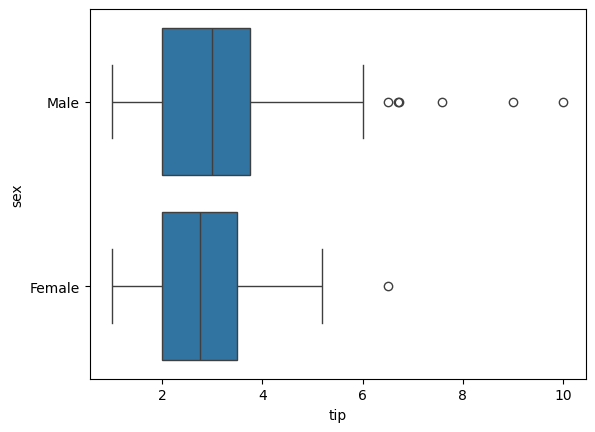

In [89]:
tips = sns.load_dataset("tips")
sns.boxplot(data=tips, x='tip', y='sex');

er is veel overlap tussen de verschillende groepen, dit geeft aan dat er geen relatie is tussen beide variabelen.

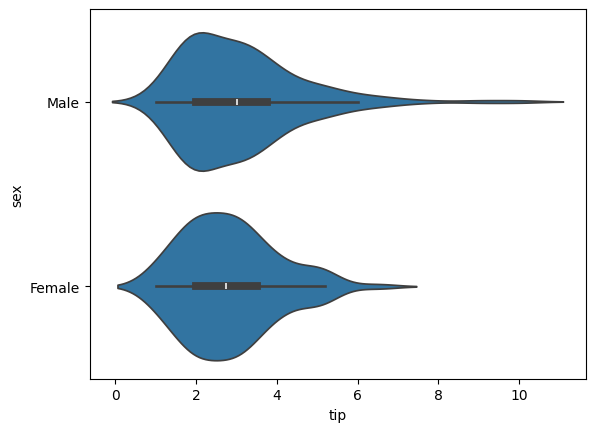

In [92]:
sns.violinplot(data=tips, x='tip', y='sex');

### Dichtheidsplot

Breng voor een dichtheidsgrafiek (kerneldichtheidsschatting) de onafhankelijke (kwalitatieve) variabele in kaart op het 'hue'-attribuut en de afhankelijke variabele op de X-as.

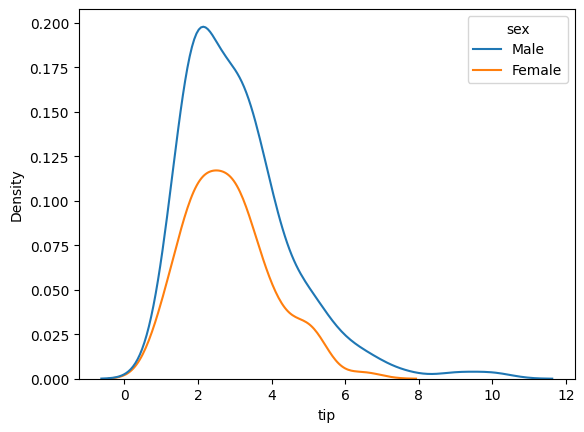

In [93]:
sns.kdeplot(data=tips, hue='sex', x='tip');

### Staafdiagram met foutbalken

Een ander diagramtype dat vaak voor dit type gegevens wordt gebruikt, is een staafdiagram van het steekproefgemiddelde van elke groep. Pas hierbij echter op. Alleen het tonen van het steekproefgemiddelde in een grafiek is onvoldoende om te bepalen of een verschil tussen groepen significant is. Een grafiek moet ook de spreiding in de dataset laten zien. Dit kan worden gevisualiseerd met behulp van foutbalken.

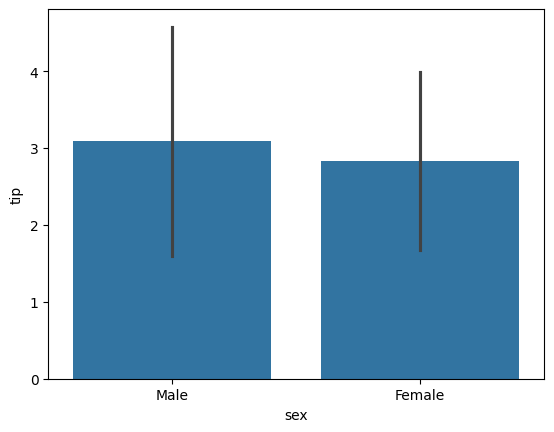

In [95]:
sns.barplot(data=tips, x='sex', y='tip', errorbar='sd');

## The t-test for two independent samples

Dit is voor 2 verschillende testgroepen

eerder hebben we gezien hoe we de t-toets kunnen toepassen om een uitspraak over het steekproefgemiddelde van een kleine steekproef te verifiëren. De t-toets kan ook worden gebruikt om twee steekproeven te vergelijken. Eerst bekijken we het geval van onafhankelijke steekproeven die afzonderlijk werden genomen.

Voorbeeld: In een klinische proef willen onderzoekers bepalen of een nieuw medicijn een verminderde reactiesnelheid, oftewel een hogere reactietijd, als bijwerking heeft. Zes deelnemers kregen het medicijn (behandelingsgroep), terwijl zes anderen een placebo kregen (controlegroep). Hun responstijd op een stimulus werd vervolgens gemeten (in ms). We willen onderzoeken of er significante verschillen zijn tussen de behandelings- en controlegroep.

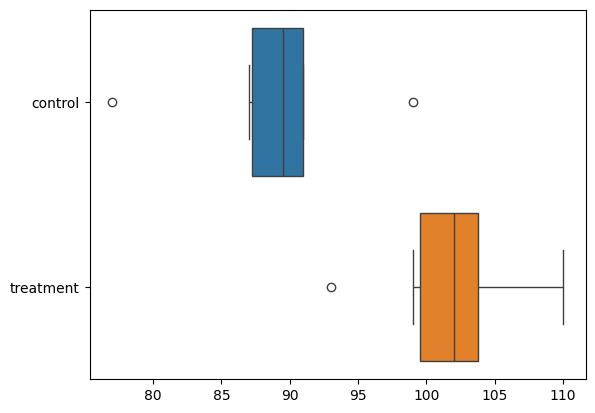

In [96]:
control = np.array([91, 87, 99, 77, 88, 91])
treatment = np.array([101, 110, 103, 93, 99, 104])
# Visualization:
sns.boxplot(
    data=pd.DataFrame({'control': control, 'treatment': treatment}),
    orient='h');

The population mean for patients in the control group is notated $\mu_1$, for those in the treatment group $\mu_2$.

The hypotheses are:

- $H_0$: $\mu_1 - \mu_2 = 0$ (reaction time is the same in both groups)
- $H_1$: $\mu_1 - \mu_2 < 0$ (reaction time is significantly higher in the treatment group compared to the control group)

In [97]:
stats.ttest_ind(a=control, b=treatment,
    alternative='less', equal_var=False)

TtestResult(statistic=np.float64(-3.445612673536487), pvalue=np.float64(0.003391230079206901), df=np.float64(9.479682492670932))

De p-waarde is erg klein, wat betekent dat, als de nulhypothese correct zou zijn, het zeer onwaarschijnlijk is dat de verschillen tussen de twee groepen waarneembaar zijn. Daarom verwerpen we de nulhypothese. Op basis van de steekproef is er reden om te concluderen dat het medicijn inderdaad een significante invloed heeft op de reactiesnelheid.

Voorbeeld: Krijgen mannelijke en vrouwelijke medewerkers in de dataset fooien dezelfde fooi of is er een verschil?

In [99]:
stats.ttest_ind(alternative='two-sided',
    a=tips.tip[tips.sex == 'Male'],
    b=tips.tip[tips.sex == 'Female'])

TtestResult(statistic=np.float64(1.387859705421269), pvalue=np.float64(0.16645623503456755), df=np.float64(242.0))

De p-waarde van 0,166 is vrij groot, dus we verwerpen de nulhypothese niet. Op een significantieniveau van b.v. 0.05 bevat de dataset geen bewijs dat mannelijke en vrouwelijke bedienend personeel verschillende fooien krijgen.

## The t-test for paired samples

Dit is voor 1 groep, een voor en na onderzoek

In deze variant van de $t$-test wordt aan elk element van het monster een meting gedaan, één keer voor en één keer na een interventie. Het doel is om vast te stellen of de interventie een significant effect heeft gehad op de meting.

**Case:** In een onderzoek is gekeken of auto's die rijden op benzine met toevoegingen ook een lager verbruik hebben. Tien auto's werden eerst gevuld met ofwel gewone benzine ofwel benzine met additieven (bepaald door het opgooien van een muntstuk), waarna het verbruik werd gemeten (uitgedrukt in mijlen per gallon). De auto's werden vervolgens afgetankt met de andere soort benzine en het verbruik werd opnieuw gemeten.

We gebruiken een gepaarde $t$-test om te bepalen of auto's significant zuiniger zijn op benzine met additieven.

In [100]:
# Measurements:
regular =   np.array([16, 20, 21, 22, 23, 22, 27, 25, 27, 28])
additives = np.array([19, 22, 24, 24, 25, 25, 26, 26, 28, 32])

# Paired t-test with ttest_rel()
stats.ttest_rel(regular, additives, alternative='less')

TtestResult(statistic=np.float64(-4.47213595499958), pvalue=np.float64(0.00077494295585091), df=np.int64(9))

We gebruiken `alternative='less'` omdat we willen controleren of de kilometerstand per gallon op gewone brandstof kleiner is dan op brandstof met toevoegingen.

De $p$-waarde, 0.0007749, is erg klein. Zelfs met een $\alpha = 0.01$ kunnen we de nulhypothese verwerpen. Volgens deze steekproef hebben we redenen om aan te nemen dat de brandstof met additieven inderdaad leidt tot een aanzienlijk lager brandstofverbruik.

### oefening van het oefenexamen
De steekproef die hieronder gegeven is, bevat meetresultaten van een variabele Temperatureop twee tijdstippen (time1entime2). We willen weten of de metingen op het tweede tijdstipsignificant verschillend zijn van die op het eerste tijdstip.Gebruik een geschikte statistische toets (met significantieniveau 5%) om deze uitspraak teverifi ̈eren

In [ ]:
# (a)Welke statistische toets moet je gebruiken om deze onderzoeksvraag te beantwoorden?Wees zo specifiek mogelijk!

#two sample t test for paired samples

# (b)Formuleer de nulhypothese en de alternatieve hypothese.

#H0 = de metingen op het 2de tijdsstip zijn niet significant verschillend vandie op de eerste tijdsstip
#H1 = de metingen op het 2de tijdsstip zijn significant verschillend vandie op de eerste tijdsstip

# (c)Bereken de p-waarde.

# Measurements:
time1 =   np.array(df.time1)
time2 = np.array(df.time2)

# Paired t-test with ttest_rel()
s,p = stats.ttest_rel(time1, time2, alternative='two-sided')

print(f"de p-waarde is {p} en is >> 5% => er is niet voldoende om H0 te verwerpen")
# (d)Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeks-vraag.

de p-waarde is 0.8743994859994443 en is >> 5% => er is niet voldoende om H0 te verwerpen

### Cohen's d
Cohen's d wordt gedefinieerd als het verschil tussen de gemiddelden van beide groepen, gedeeld door een gepoolde standaarddeviatie. Er is geen Python-functie voor het berekenen van Cohen's d direct beschikbaar, dus we definiëren het hier, volgens de formule:

In [ ]:
def cohen_d(a, b):
    na = len(a)
    nb = len(b)
    pooled_sd = np.sqrt( ((na-1) * a.std(ddof=1)**2 +
                          (nb-1) * b.std(ddof=1)**2) / (na + nb - 2) )
    return (b.mean() - a.mean()) / pooled_sd

In [ ]:
# Effect size of additives in gasoline:
cohen_d(regular, additives)

0.5573262931770191

# Module 6. Bivariate analyse van 2 kwantitatieve variabelen

In deze module bespreken we het geval waarin beide variabelen kwantitatief zijn. In het bijzonder zullen we het concept van lineaire regressie onderzoeken. Er bestaan ​​wel andere analysemethoden, maar die vallen buiten het bestek van deze cursus.

Regressieanalyse is een uiterst flexibel hulpmiddel dat op veel gebieden kan helpen bij het nemen van beslissingen.

Er zijn twee mogelijke doelstellingen van regressieanalyse. Het eerste doel is om te begrijpen hoe de wereld werkt. Men zou bijvoorbeeld kunnen proberen te ontdekken of er sprake is van discriminatie op grond van geslacht in salarissen, rekening houdend met verschillen in werkervaring en opleidingsniveau.
Het tweede doel is om voorspellingen te doen. Een goed voorbeeld hiervan is wanneer de betreffende variabele bedrijfsverkopen is, en variabelen zoals reclame en eerdere verkoopniveaus als verklarende variabelen worden gebruikt.

## visualisatie

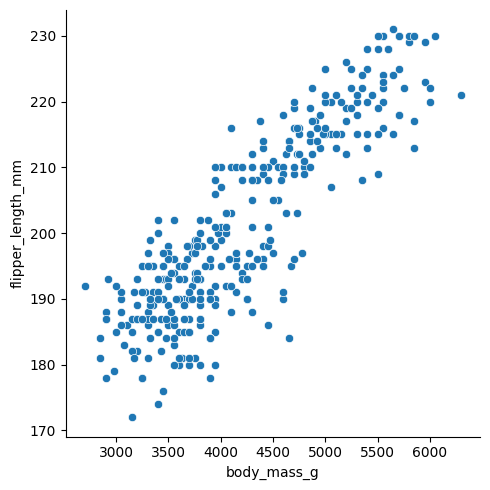

In [102]:
penguins = sns.load_dataset('penguins') # Load the Palmer Penguins demo dataset

sns.relplot(data=penguins, x='body_mass_g', y='flipper_length_mm')

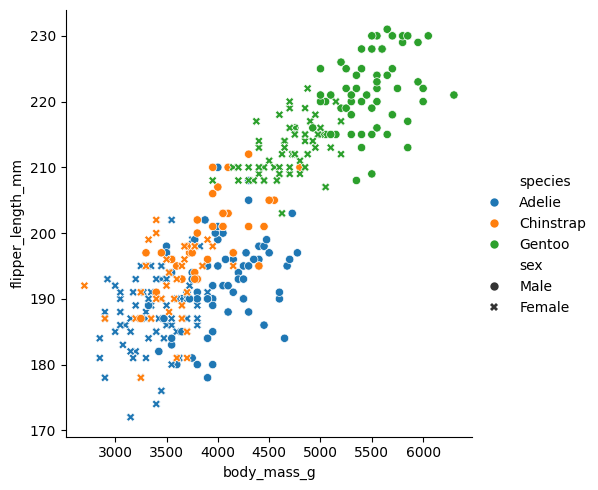

In [103]:
sns.relplot(data=penguins,
            x='body_mass_g', y='flipper_length_mm',
            hue='species', style='sex')

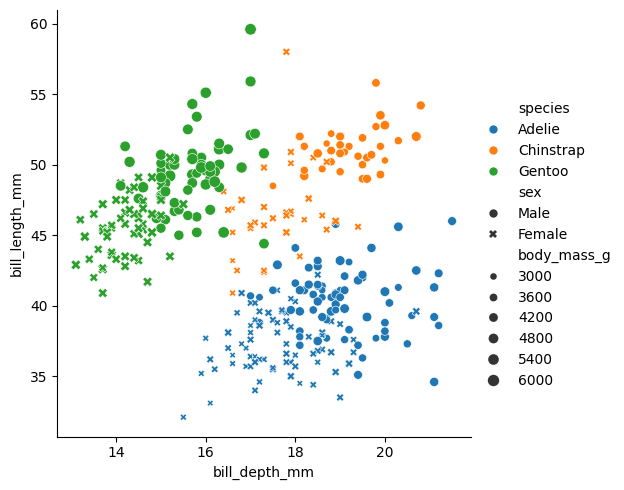

In [104]:
sns.relplot(data=penguins,
            x='bill_depth_mm', y='bill_length_mm',
            size='body_mass_g', 
            hue='species', style='sex')

## Methode van de kleinste kwadraten

In [108]:
# Voorbereiding van de data
male_chinstrap = penguins[(penguins['species'] == 'Chinstrap') & (penguins['sex'] == 'Male')]
male_chinstrap = male_chinstrap.groupby('flipper_length_mm')['body_mass_g'].mean().reset_index()

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

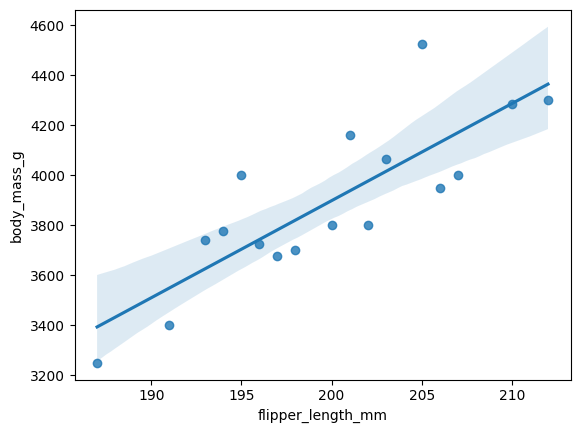

In [109]:
sns.regplot(x=male_chinstrap.flipper_length_mm, y=male_chinstrap.body_mass_g)

In [ ]:
least_squares = pd.DataFrame({
        'x': male_chinstrap.flipper_length_mm,
        'y': male_chinstrap.body_mass_g
    })
mx = least_squares.x.mean()
my = least_squares.y.mean()

least_squares['(x-x̄)'] = least_squares['x'] - mx
least_squares['(y-ȳ)'] = least_squares['y'] - my

least_squares['(x-x̄)(y-ȳ)'] = least_squares['(x-x̄)'] * least_squares['(y-ȳ)']
least_squares['(x-x̄)²'] = least_squares['(x-x̄)'] ** 2
least_squares

In [111]:
# Numerator and denomitator of the formula for b_0:
num = sum(least_squares['(x-x̄)(y-ȳ)'])
denom = sum(least_squares['(x-x̄)²'])
beta1 = num/denom
beta0 = my - beta1 * mx

print(f"beta_1 = {num:.4f} / {denom:.4f} = {beta1:.4f}")
print(f"beta_0 = {my:.4f} - {beta1:.4f} * {mx:.4f} = {beta0:.4f}")
print(f"ŷ = {beta0:.4f} + {beta1:.4f} x")

beta_1 = 29375.4902 / 756.4706 = 38.8323
beta_0 = 3891.2745 - 38.8323 * 199.8235 = -3868.3320
ŷ = -3868.3320 + 38.8323 x


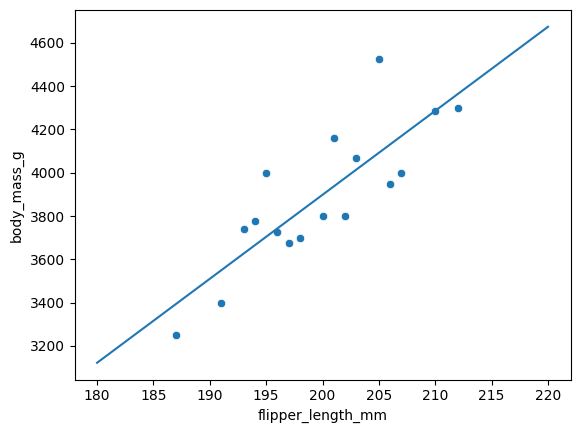

In [112]:
# set the minimum and maximum value of the x- and y-axis
xmin = math.floor(male_chinstrap['flipper_length_mm'].min() / 10) * 10
xmax = math.ceil(male_chinstrap['flipper_length_mm'].max() / 10) * 10

ymin = math.floor(male_chinstrap['body_mass_g'].min() / 10) * 10
ymax = math.ceil(male_chinstrap['body_mass_g'].max() / 10) * 10

x_values = [xmin, xmax]
y_values = [beta1 * x_values[0] + beta0, beta1 * x_values[1] + beta0]

sns.lineplot(x=x_values, y=y_values);
sns.scatterplot(x=male_chinstrap.flipper_length_mm, y=male_chinstrap.body_mass_g);

In [113]:
#In het kort met functie
from sklearn.linear_model import LinearRegression

male_chinstrap_x = male_chinstrap.flipper_length_mm.values.reshape(-1,1)
male_chinstrap_y = male_chinstrap.body_mass_g

weight_model = LinearRegression().fit(male_chinstrap_x, male_chinstrap_y)

print(f"Regression line: ŷ = {weight_model.intercept_} + {weight_model.coef_[0]} x")

Regression line: ŷ = -3868.3320373250385 + 38.83229652669777 x


### oefening uit het voorbeeldexamen


In [ ]:
sns.regplot(x=df.x, y=df.y)

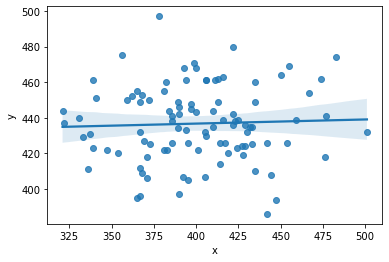

In [ ]:
from sklearn.linear_model import LinearRegression

x = df.x.values.reshape(-1,1)
y = df.y

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_} + {weight_model.coef_[0]} x")

Regression line: ŷ = 427.4330190404864 + 0.023210537909158994 x

In [ ]:
# (a)Bereken de richtingsco efficient van de regressierechte
print(f"de richtingscoeficient is {weight_model.coef_[0]}")

# (b)Bereken het snijpunt van de regressierechte met de y-as
print(f"het snijpunt met de y-as is {weight_model.intercept_}")

# bereken de covariantie
cov =np.cov(df.x, df.y, ddof=1)[0][1]
print(f"cov = {cov}")

# (c)Bereken de correlatieco ̈effici ̈ent (symbool + waarde)
cor = np.corrcoef(df.x,df.y)[0][1]
print(f"R = {cor}")

# (d)Formuleer een interpretatie voor de waarde van de correlatieco ̈effici ̈ent
#teken is positief => stijgend verband
# grootte van R ~ 0 => zeer zwak verband

# (e)Bereken de determinatieco ̈effici ̈ent (symbool + waarde)
print(f"R**2= {cor**2}")
# (f)Geef een interpretatie voor de waarde van de determinatieco ̈effici ̈ent
#grootte van R**2 is ongeveer nul => zwak verband
# verklaring van de variantie

de richtingscoeficient is 0.023210537909158994  
het snijpunt met de y-as is 427.4330190404864  
cov = 33.26111111111113  
R = 0.04160588959380872  
R**2= 0.0017310500488922004

## Covariantie

Covariance is a measure that indicates whether a (linear) relationship
between two variables is increasing or decreasing.

Note: Covariance of population (denominator 𝑛) vs. sample (denominator 𝑛 − 1)

Cov > 0: increasing  
Cov ≈ 0: no relationship  
Cov < 0: decreasing

Covariance kan serieus verschillen adhv welke meeteeinheid je gebruikt. Cov van 2500 in g, is maar 2.5 in kg.

In [ ]:
families = pd.DataFrame(data={
    'x': [1,1,2,2,2,2,3,3,3,3,4,4,4,5,6],
    'y': [2,3,2,3,4,5,2,3,4,5,5,6,8,6,7]
})

sns.regplot(x=families.x, y=families.y) # data set with its regression line
plt.axvline(families.x.mean(), lw=1, color='g', linestyle='dashed')  # Plot mean of x
plt.axhline(families.y.mean(), lw=1, color='y', linestyle='dashed')  # Plot mean of y

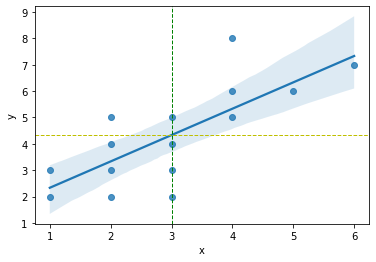

Covariantie is in wezen een gemiddelde van producten van afwijkingen van gemiddelden. Als X en Y in dezelfde richting variëren, zal Y, wanneer X boven zijn gemiddelde ligt, de neiging hebben boven zijn gemiddelde te zijn, en wanneer X onder zijn gemiddelde ligt, zal Y de neiging hebben onder zijn gemiddelde te liggen. In beide gevallen zal het product van afwijkingen positief zijn - een positief maal een positief of een negatief maal een negatief - dus de covariantie zal positief zijn. Het tegenovergestelde is waar wanneer X en Y in tegengestelde richtingen variëren. Dan is de covariantie negatief.

In [ ]:
# Calculate covar using the formula
covar = sum((male_chinstrap.flipper_length_mm - male_chinstrap.flipper_length_mm.mean()) * 
            (male_chinstrap.body_mass_g - male_chinstrap.body_mass_g.mean())) / (len(male_chinstrap) - 1)
        
print(f"Cov(x,y) = {covar}")

In [ ]:
# Of met functie
np.cov(
    male_chinstrap.flipper_length_mm,
    male_chinstrap.body_mass_g,
    ddof=1)[0][1]

## Pearson's product-moment corelation coefficient

𝑅 is a measure for
the strength of a linear correlation between 𝑥 and 𝑦.

Correlation is a unitless quantity that is unaffected by the measurement scale. For example, the correlation
is the same regardless of whether the variable X (e.g. height of a person) is measured in millimeters, centimeters, decimeters or meters.

Always between -1 and 1. The closer to -1 or 1, the closer the points in a scatterplot are to a striaght line.

Bvb: R = (-)0.8 -> (decreasing)increasing and strong linear relation

In [ ]:
# Correlation calculated from covariance
stdx = male_chinstrap.flipper_length_mm.std()
stdy = male_chinstrap.body_mass_g.std()

R1 = covar / (stdx * stdy)
print(f"R ≈ {covar:.4f} / ( {stdx:.4f} * {stdy:.4f} ) ≈ {R1:.4f}")

In [ ]:
# Correlation from elaborated formula
xx = male_chinstrap.flipper_length_mm - male_chinstrap.flipper_length_mm.mean()
yy = male_chinstrap.body_mass_g - male_chinstrap.body_mass_g.mean()
R2 = sum(xx * yy) / (np.sqrt(sum(xx ** 2) * sum(yy ** 2)))
print(f"R ≈ {R2:.4f}")

In [ ]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(
    male_chinstrap.flipper_length_mm,
    male_chinstrap.body_mass_g)[0][1]
print(f"R ≈ {cor:.4f}")

## Coefficient of determenation


In [ ]:
cor ** 2

In [ ]:
chinstrap_x = male_chinstrap.flipper_length_mm.values.reshape(-1,1)
chinstrap_y = male_chinstrap.body_mass_g

families_model = LinearRegression().fit(chinstrap_x, chinstrap_y)
families_model.score(chinstrap_x, chinstrap_y)


R**2: Zelfde als hierboven, maar ^2 -> makkelijker af te lezen.

| $abs(R)$  |  $R^2$   | Explained variance |   Linear relation    |
| :-------: | :------: | :----------------: | :------------------: |
|   < .3    |   < .1   |       < 10%        |      very weak       |
|  .3 - .5  | .1 - .25 |     10% - 25%      |         weak         |
|  .5 - .7  | .25 - .5 |     25% - 50%      |       moderate       |
| .7 - .85  | .5 - .75 |     50% - 75%      |        strong        |
| .85 - .95 | .75 - .9 |     75% - 90%      |     very strong      |
|   > .95   |   > .9   |       > 90%        | exceptionally strong |

Remark that the value of R doesn't say anything about the steepness of the regression line! It only indicates how close the observations are to the regression line. Therefore, it is wrong to say that a value of e.g. R = 0.8 indicates a strongly increasing linear relation! Instead, you should say it indicates an _increasing and strong linear relation_.

# Module 7. Time series analysis

Level: Smoothing factor?

Trend: Observations increase or decrease regularly through time.

Seasonal: Seasonal trend repeats itself every year


In [131]:
# Read the data from CSV, parse dates and set the index
wounded_data = pd.read_csv(
    'https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/number_of_heavily_wounded_car_accidents_VL.txt',
    delimiter = "\t",
    parse_dates=['date']).set_index(['date'])

# Add frequency info to the index
wounded_data.index = pd.DatetimeIndex(wounded_data.index, freq='MS')

wounded_data.head()

,number_of_heavily_wounded
date,
2013-01-01,285
2013-02-01,276
2013-03-01,332
2013-04-01,381
2013-05-01,393


<Axes: >

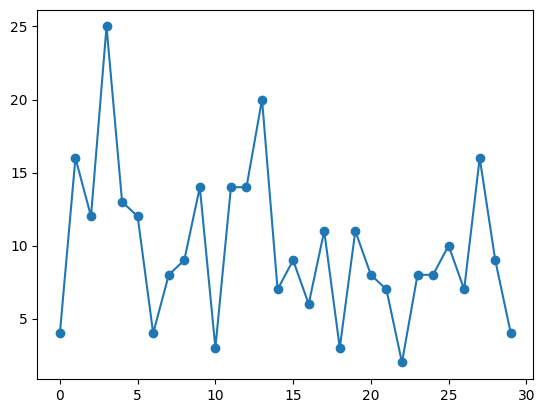

In [115]:
demand_ts = pd.Series(
    data=[4, 16, 12, 25, 13, 12, 4,  8, 9, 14,
          3, 14, 14, 20,  7,  9, 6, 11, 3, 11,
          8,  7,  2,  8,  8, 10, 7, 16, 9,  4]
)
demand_ts.plot(marker='o')

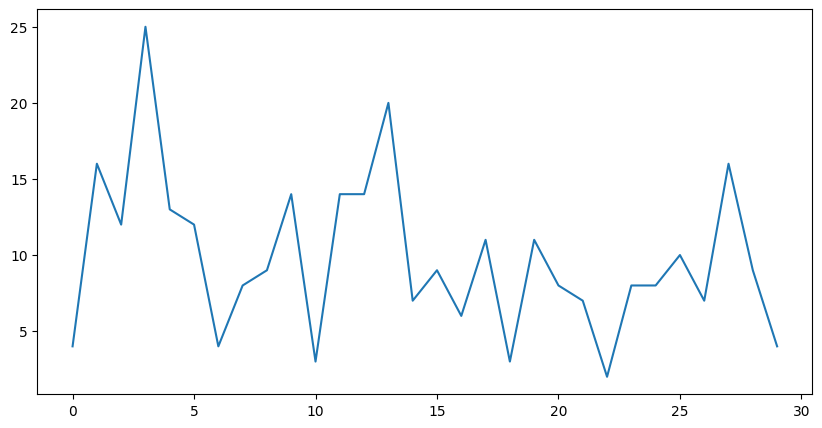

In [116]:
demand_ts.plot( y='data', figsize=[10,5]);

## Time series models

In de onderstaande grafiek proberen we waargenomen waarden te modelleren met een constante functie Xt=b+εt (met wat willekeurige ruis met constante variantie). Als schatting voor b nemen we het gemiddelde van de eerste waarnemingen. We kunnen in principe ons eigen oordeel gebruiken om te kiezen hoeveel.

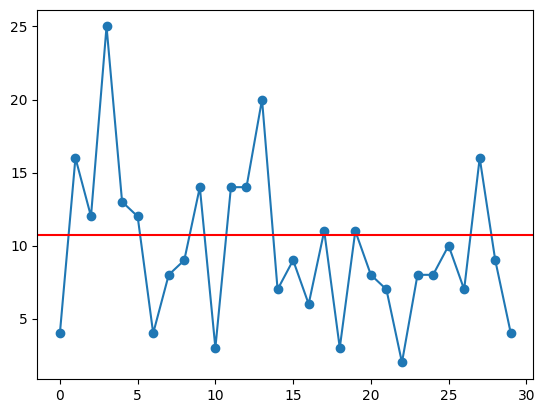

In [118]:
b_est_20 = demand_ts[0:20].mean()
b_est_30 = demand_ts[0:30].mean()

demand_ts.plot(marker='o')             # Plot the time series
plt.axhline(y=b_est_20, color='red')   # Mean of first 20 observations
#plt.axhline(y=b_est_30, color='blue')  # Mean of first 30 observations

If we want to model these values with a linear function $X_t = b_0 + b_1 t + \varepsilon_t$, we can use a technique we actually already used in another context: linear regression. A linear trend means that the time series variable changes by a constant amount each time
period.

The interpretation of $b_1$ is that it represents the expected change in the series from one
period to the next. If $b_1$ is positive, the trend is upward; if $b_1$ is negative, the trend is downward.
The intercept term $b_0$ is less important. It literally represents the expected value of the series at time t = 0.

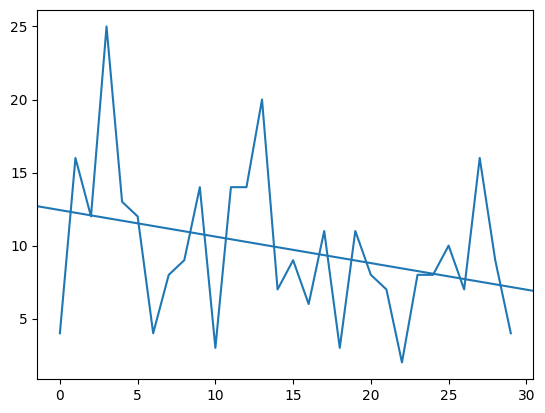

In [123]:
# Build a linear regression model
demand_lm = LinearRegression().fit(
    demand_ts.index.values.reshape((-1,1)),
    demand_ts.values
)
# plot the time series and the regression line
plt.plot(demand_ts.index.values, demand_ts.values)
plt.axline((0, demand_lm.intercept_), slope=demand_lm.coef_[0]);

<Axes: >

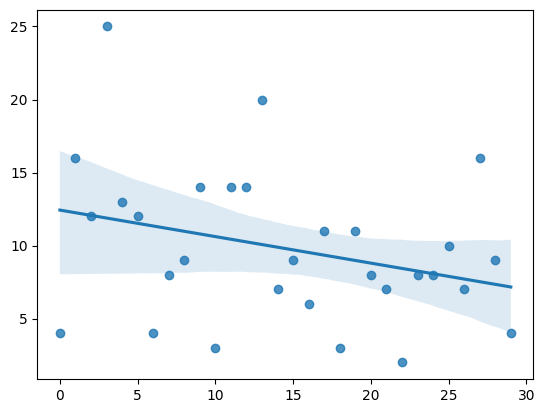

In [124]:
sns.regplot(x=demand_ts.index, y=demand_ts.values)

## voortschrijdend gemiddelde
We basically need a method that takes the last observations into account, but forgets observations after some time. Older observations may no longer be representative of the current demand. Moving averages are such methods.

It's useful to create a DataFrame to store the observations and associated moving averages.

<Axes: >

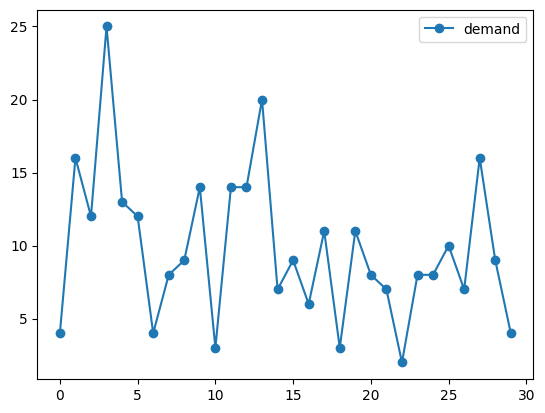

In [125]:
demand_df = pd.DataFrame(data={
    'demand': demand_ts
})
demand_df.plot(marker='o')

## Eenvoudig voortschrijdend gemiddelde

In [ ]:
demand_df['SMA3'] = demand_df.demand.rolling(3).mean()
demand_df['SMA5'] = demand_df.demand.rolling(5).mean()
demand_df['SMA10'] = demand_df.demand.rolling(10).mean()
demand_df

<Axes: >

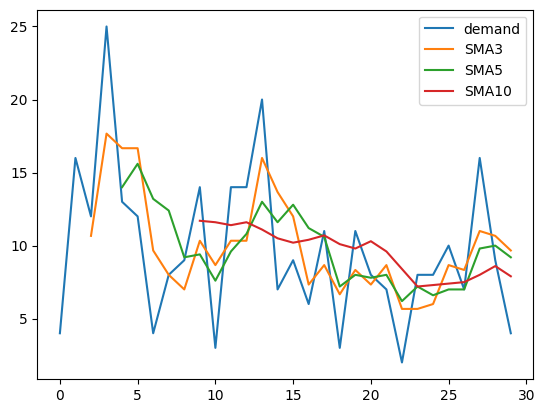

In [127]:
demand_df.plot()

**Exponential smoothing** is a method that addresses both points of criticism. It bases its
predictions on a weighted average of past observations, with more weight on the more recent
observations, and it requires very little data storage. Moreover, it is not difficult for most business people to understand, at least conceptually. Therefore, this method is widely used in the
business world, especially when frequent and automatic forecasts of many items are required.
There are many variations of exponential smoothing.
**Single exponential smoothing** is appropriate for a series with no pronounced trend or seasonality. **Holt's method** is appropriate for a series with trend but no seasonality.
**Winters' method** is appropriate for a series with seasonality (and possibly trend).


### Single exponential smoothing / Exponential moving average

**No pronounced trend or seasonality**

$X_t = \alpha x_t + (1 - \alpha) X_{t-1}$

$F_{t+m} = X_t$

* $\alpha$ is the smoothing constant and is a number between 0 and 1
* $X_t$ is the _level_ of the series at time _t_. This value is not observable but can only be estimated. Essentially, it is
an estimate of where the series would be at time _t_ if there were no random noise.
* $F_{t+m}$ is the forecast at time m

In [ ]:
wounded_data['EMA_0.1'] = wounded_data['number_of_heavily_wounded'].ewm(alpha=.1, adjust=False).mean()
wounded_data['EMA_0.5'] = wounded_data['number_of_heavily_wounded'].ewm(alpha=.5, adjust=False).mean()

wounded_data.plot(y=['number_of_heavily_wounded',  'EMA_0.1', 'EMA_0.5'], figsize=[10,5]);

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Train the model
data_ses = SimpleExpSmoothing(wounded_data['number_of_heavily_wounded']).fit(
    smoothing_level=0.1, optimized=False) #smoothing level = alpha

# Add fitted values to the dataframe
wounded_data['SES'] = data_ses.level
wounded_data.head(20)

In [ ]:
wounded_data.plot(y=['number_of_heavily_wounded',  'SES'], figsize=[10,5]);

In [ ]:
# Maken van een forecast voor de volgende 12 maanden
data_ses_fcast = data_ses.forecast(12)

wounded_data.plot(y=['number_of_heavily_wounded',  'SES'], figsize=[10,5])
data_ses_fcast.plot(marker='.', legend=True, label='Forecast');

In [ ]:
print(data_ses.level)
print(data_ses_fcast.values)

In [ ]:
# Om te kijken naar de voorspelde waarde VS de echte geobserveerde waarde, gaan we terug in de tijd met fittedvalues
wounded_data['SES_predicted_value'] = data_ses.fittedvalues

In [ ]:
# De automatisch gegenereerde waarden uit het model bekijken
data_ses.params_formatted

### Double exponential smoothing

**Use: Pronounced trend in the series (no seasonality)**

If we suspect that there is a long-term (increasing or decreasing) trend in the time series, we can use Double Exponential Smoothing (DES), also called Holt's Method.

$X_{t} = \alpha x_{t} + (1-\alpha)(X_{t-1} + b_{t-1})$

$b_{t} = \beta(X_{t}-X_{t-1}) + (1-\beta)b_{t-1}$

$F_{t+m} = X_t + mb_t$

with smoothing parameters $0 < \alpha < 1$ and $0 < \beta < 1$. $b_t$ is an estimate for the trend at time $t$ and can also be interpreted as the slope of a regression line.

The first equation says that the updated level is a weighted average of the current observation and the previous level plus the estimated change.  
The second equation says that the updated trend is a weighted average of the difference between two consecutive levels and the previous trend.  
The third equation says that the $m$-period-ahead forecast made in period t is the estimated level plus m times the estimated change per period.

In [ ]:
from statsmodels.tsa.api import Holt

data_des = Holt(wounded_data['number_of_heavily_wounded']).fit(
    smoothing_level=.1,
    smoothing_trend=.2,
    optimized=False)

wounded_data['DES'] = data_des.level
wounded_data.tail()

In [ ]:
wounded_data.plot(y=['number_of_heavily_wounded',  'DES'], figsize=[10,5]);

In [ ]:
# De parameters ophalen
data_des.params_formatted

In [ ]:
data_des_fcast = data_des.forecast(12)

# Plot observations, fitted values and forecast
wounded_data['number_of_heavily_wounded'].plot(marker='o', legend=True)
wounded_data['DES'].plot(legend=True, label='DES fitted values', figsize=[10,5]);
data_des_fcast.plot(marker='.', legend=True, label='Forecast DES');

In [ ]:
data_des_fcast
data_des.level
data_des.trend

In [ ]:
# Om te vergelijken met voorspelling in het verleden
wounded_data['DES_prediction_next_month'] = data_des.level + data_des.trend # predicted value for next month => m = 1
wounded_data['DES_fittedvalues'] = data_des.fittedvalues
wounded_data.tail()

### Triple Exponential Smoothing

**Use: Trend + Seasonal changes**

Triple Exponential Smoothing (TES), also called *Holt-Winter's Method*, can in addition also model seasonally recurring trends.

- Level smoothing: $X_{t} = \alpha \frac{x_{t}}{c_{t-L}} + (1-\alpha) (X_{t-1} + b_{t-1})$
- Trend smoothing: $b_{t} = \beta (X_{t} - X_{t-1}) + (1-\beta)b_{t-1}$ 
- Seasonal smoothing: $c_{t} = \gamma \frac{x_{t}}{X_{t}} + (1-\gamma)c_{t-L}$
- Forecast for $m$ time units after the last observation: $F_{t+m} = (X_{t} + m b_{t})c_{t-L+1+(m-1) \mod L}$

In these formulas, the following additional notation is used:

- $L$ is the length (in number of time units) of the seasonal cycle. Common values are 7 for a weekly cycle, 4 for a quarterly one, 12 for a monthly cycle, etc.
- $0 < \gamma < 1$ is the smoothing parameter for the seasonal trend (like $\alpha$ and $\beta$). Set this value in the `fit()` method using argument `smoothing_seasonal`.
- $c_t$ are estimates for the seasonal correction factors, one for each time unit $t\mod L$ within the seasonal cycle.

The example dataset used in the previous sections is not suitable for this, as it has no seasonal trend. Instead, we will use a demo dataset from Seaborn with air passenger data for 12 years from 1949 to 1960.

The dataset has two columns for the date (year and month). To make our lives a bit easier, we'll add a column with the date using Pandas' `date_range()` function. The `freq='MS'` parameter denotes that we want each consecutive date in the range to be the first day of the next month.

In an **additive seasonal model**, an appropriate seasonal index is added to a base
forecast.

In a **multiplicative seasonal model**, a base forecast is multiplied by an appropriate
seasonal index.


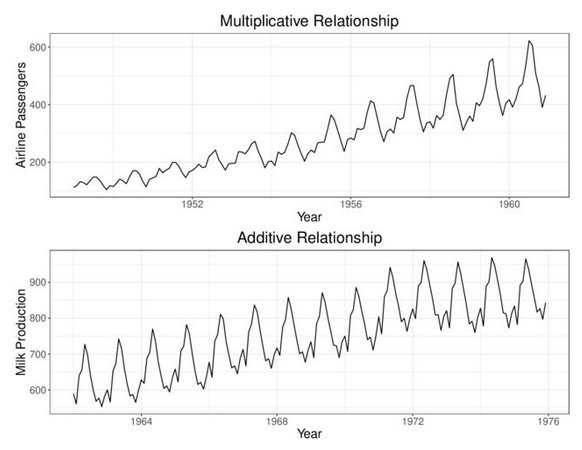


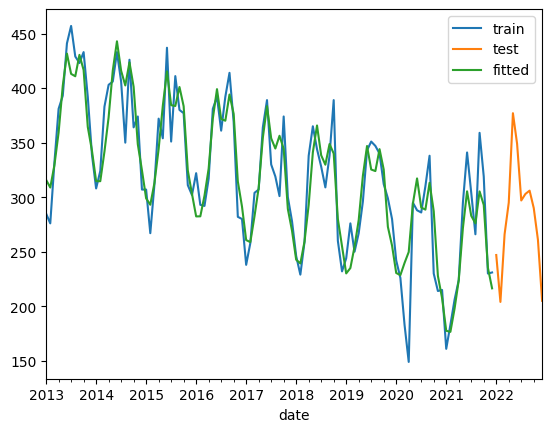

In [132]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = wounded_data.number_of_heavily_wounded[:-12]
test = wounded_data.number_of_heavily_wounded[-12:]

# seasonal kan mul zijn als het groter wordt, zie afbeelding hierboven
wounded_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
(wounded_hw.level + wounded_hw.season).plot(legend=True, label='fitted');

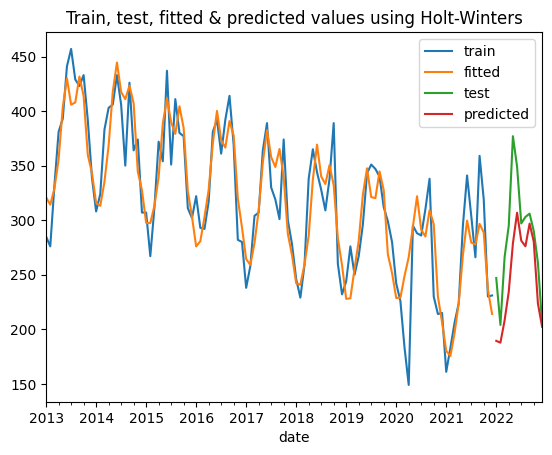

In [133]:
wounded_predicted = wounded_hw.forecast(12)

train.plot(legend=True, label='train')
wounded_hw.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
wounded_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters');


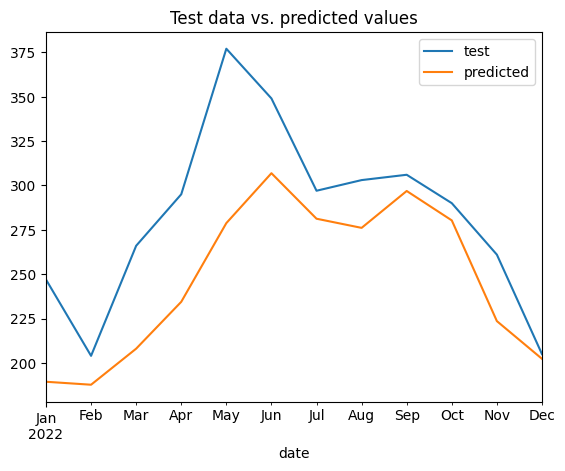

In [134]:
#Ingezoomd op het laatste deel
test.plot(legend=True, label='test');
wounded_predicted.plot(legend=True, label='predicted');
plt.title('Test data vs. predicted values');

In [ ]:
wounded_predicted
# Retrieve the automatically calculated parameters of the model:
wounded_hw.params_formatted
wounded_hw.level
wounded_hw.trend
wounded_hw.season

In [135]:
# Predicted value by forecast():
print(wounded_predicted.iloc[0])

# Computed manually from model internals:
(wounded_hw.level.iloc[-1] + wounded_hw.trend.iloc[-1]) + wounded_hw.season.iloc[-12]

189.40355165963558


np.float64(189.40355165963558)

### Evaluating the quality of a model

In the Holt-Winters model, there are 3 smoothing constants: $\alpha$, $\beta$ and $\gamma$. What are the most appropriate values? Should $\alpha$ be 0.1, or rather 0.5? And what about $\beta$?
We need a metric to help us decide if one model performs better than another model.

Two commonly used metrics for this are the Mean Absolute Error (MAE) and Mean Squared Error (MSE), in which we compare the $m$ forecasted values with the observed values in the test set.

$$MAE = \frac{1}{m} \sum_{i=t+1}^{t+m} \left| x_i - F_i \right|$$

$$MSE = \frac{1}{m} \sum_{i=t+1}^{t+m} (x_i - F_i)^{2}$$

Remark the similarities between the formula for MSE and variance!

Applied to our case, we get:

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE = {mean_absolute_error(test,wounded_predicted)}')
print(f'MSE = {mean_squared_error(test,wounded_predicted)}')

In [ ]:
print(f'√MSE  = {np.sqrt(mean_squared_error(test,wounded_predicted))}')
print(f'stdev = {wounded_data.number_of_heavily_wounded.std()}')

The square root of the MSE is well within one standard deviation of the original data, which is an indicator that the model performs well.

### Decomposing a time series

A data series that shows a long term and seasonal trend can be "decomposed":

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# remove other columns (e.g. SES, DES, ...)
data = wounded_data[['number_of_heavily_wounded']]

wounded_decomposed = seasonal_decompose(data, model='additive')
wounded_decomposed.plot();

# Extra: Handige functies

In [ ]:
# Mappen van data mbv dict of functie:
mapping_dict = {'male' : 0, 'female' : 1}
titanic['Sex'] = titanic['Sex'].map(mapping_dict)

def age_to_category(age):
    if age < 12:
        return "child"
    if age < 18:
        return "teen"
    return "adult"

titanic['AgeCategory'] = titanic['Age'].map(age_to_category)

In [ ]:
# Als een datum als een string staat, en we willen die datum kolom als index hebben:
air_quality = pd.read_csv(URL, index_col=0, parse_dates=True)

In [ ]:
# Random getal, waarde, sample:
getal = np.random.random() # tussen 0 en 1
sample = sample = np.random.choice(data, size=10)

In [ ]:
# Groepeer een dataset volgens bepaalde kolommen, en bereken met een andere kolom
print(f"Mean  {android.groupby(['DataSize','PersistenceType'])['Time'].mean()}")

# Plots

## Kwalitiatief + kwalitatief:

In [ ]:
# Clustered bar chart / staafdiagram
sns.catplot(data=rlanders, x='Survey', hue='Gender', kind='count')

In [ ]:
#Stacked bar chart / rependiagram
# Contingency table without the margins
observed_p = pd.crosstab(rlanders.Gender, rlanders.Survey, normalize='index')

# Horizontally oriented stacked bar chart
observed_p.plot(kind='barh', stacked=True);

In [ ]:
#Mosaic diagram / mozaiekdiagram
import matplotlib as mpl

plasma_colors = mpl.colormaps['plasma']

props = lambda key: {'color': plasma_colors(int(key[1])/5)}

mos_gender_survey = mosaic(
       data=rlanders.sort_values(by=['Survey']),
       index=['Gender', 'Survey'],
       gap=0.05, properties=props);

## Kwalitatief + kwantitatief

In [ ]:
#Boxplot
tips = sns.load_dataset("tips")
sns.boxplot(data=tips, x='tip', y='sex');

In [ ]:
# Dichtheidsdiagram
sns.kdeplot(data=tips, hue='sex', x='tip');

## Kwantitatief + kwantitatief

In [ ]:
# Spreidingsdiagram
sns.relplot(data=penguins,
            x='bill_depth_mm', y='bill_length_mm',
            size='body_mass_g', 
            hue='species', style='sex')

# Theorie en shortcuts

## Kwalitiatief + kwalitatief:

### - (Chi-kwadraat)toets

#### Onafhankelijkheidstoets
[Zie voor lange methode, als je X² manueel berekent (niet gebruiken indien niet nodig)](#Contingentietabellen-en-visualisatietechnieken)

[Zie voor korte manier en test procedure.](#Test-procedure-X2)

#### Aanpassingstoets (Goodness-of-fit)
[Zie voor test procedure](#Goodness-of-fit-test)

### - Maat Cramer's V
[Een maat voor de associatie tussen twee kwal variabelen (0 tot 1)](#Chi-squared-and-Cramers-V)

## Kwalitiatief + kwantitatief:

### - (t-)toets

Als de populatie-standaardafwijking (sigma) niet gekend is of als n <30.

De steekproef moet aselect zijn, en de onderzochte variabele normaal verdeeld.

#### t-toets voor één steekproef
[zie voor uitwerking](#The-t-test-for-paired-samples)

#### t-toets voor twee steekproeven
[zie voor uitwerking](#The-t-test-for-two-independent-samples)

### - Maat effectgrootte (Cohen's d)

[Een maat voor de sterkte  van het verschil tussen 2 groepen (0 tot 2)](#Cohen's-d)

## Kwantitatief + kwantitatief:

### Maat correlatie - lineair verband

#### Covariantie
Positief = variabelen nemen samen toe. Negatief = variabelen evolueren tegenovergesteld.

Populatiecovariantie heeft in de noemer n ipv n-1. Ook hangt de variantie af van de meeteenheid.

[Geeft aan over een stijgend of dalend verband is tussen twee variabalen](#Covariantie)

#### Correlatiecoëfficiënt (R)
Tussen -1(dalend) en 1(stijgend). Hoe dichter bij die grenzen, hoe meer de observaties in 1 lijn liggen.

Zegt niks over hoe stijl de rechte is. Zegt niet zoveel, kan altijd een 3e variabele beide beïnvloeden

[Een maat voor de sterkte en de rchting van een lineair verband](#Pearson's-product-moment-corelation-coefficient)

#### Determinatiecoëfficiënt (R^2)
Waarde tussen 0 en 1. Als R^2 = 0.35 -> 35% van de variantie in de afhankelijke variabele wordt verklaard door de onafhankelijke variabele.

[Welk deel van afh variabale wordt verklaard door de onafh variabele](#Coefficient-of-determenation)